<a href="https://colab.research.google.com/github/Matheusvfvitor/R/blob/master/Covid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Objetivo**

Realizar uma anÃ¡lise exploratÃ³ria com os dados divulgados pela OMS sobre a evoluÃ§Ã£o do CoVid19 (Corona VÃ­rus) no planeta.

**Backaground**

Na Ãºltima terÃ§a-feira(12) a OMS classificou a evoluÃ§Ã£o dos casos de CoVid19 como uma Pandemia, que seria o Ãºltimo estÃ¡gio de proliferaÃ§Ã£o de um vÃ­rus quando ele atinge escala global, ou seja presente em todos os continentes.

Com essa anÃ¡lise vamos verificar fatores importantes como por quais regiÃµes o vÃ­rus se propogou, como estÃ¡ a taxa de mortalidade do vÃ­rus, e como se deu a evoluÃ§Ã£o do nÃºmero de casos, nos Ãºltimos 20 dias.

**Ferramentas utilizadas**

Para realizaÃ§Ã£o desse trabalho utilizei a linguagem .R , por escolha pessoal, entretanto as mesmas anÃ¡lises poderiam ter sido realidas com a liguagem python.


**Dataset**

O dataset (*.csv) contÃ©m os dados atÃ© o dia 07/03 por isso como a evoluÃ§Ã£o Ã© diÃ¡ria os dados foram congelados nessa data para anÃ¡lise, contudo devo atualizar esse estudo ao final do mÃªs de marÃ§o com os valores atualizados.



---


Vamos lÃ¡....




In [0]:
#Instalando os Pacotes

library(tidyr)
library(dplyr)
library(ggplot2)
library(treemap)
library(maps)


In [30]:
# Lendo os arquivos do dataset
smmy = read.csv("c19_data.csv")

head(smmy)


Province.State Country.Region Lat     Long     Date    Confirmed Deaths
1 Anhui          Mainland China 31.8257 117.2264 1/22/20  1        0     
2 Beijing        Mainland China 40.1824 116.4142 1/22/20 14        0     
3 Chongqing      Mainland China 30.0572 107.8740 1/22/20  6        0     
4 Fujian         Mainland China 26.0789 117.9874 1/22/20  1        0     
5 Gansu          Mainland China 36.0611 103.8343 1/22/20  0        0     
6 Guangdong      Mainland China 23.3417 113.4244 1/22/20 26        0     
  Recovered
1 0        
2 0        
3 0        
4 0        
5 0        
6 0

**Vamos iniciar pela limpeza..**


Em uma anÃ¡lise de dados mais de 50% do trabalho estÃ¡ no trabalho de limpeza e captura do banco de dados, como tive sorte esse dataset que encontrei nÃ£o possui muita coisa a ser ajustada, mesmo assim precisaremos fazer diversas manipulaÃ§Ãµes nele para que os resultados sejam os resultados que esperamos.

Vamos comeÃ§ar reduzindo um pouco o tamanho do dataset para essa primeira rodada de anÃ¡lises, retirando os valores de estado (Province.State) , latitude(Lat) e logitude(Long)


Como vocÃª vai verificar no dataset nÃ£o possui valores NA ou missing, entÃ£o nesse caso nÃ£o teremos muito trabalho para retrabalhar os dados nesse momemnto e podemos comeÃ§ar a manipulaÃ§Ã£o para gerar insights

In [31]:
c19 = smmy
c19$Province.State = NULL
c19$Lat = NULL
c19$Long = NULL
str(c19)
summary(c19)

'data.frame':	10350 obs. of  5 variables:
 $ Country.Region: Factor w/ 102 levels "Afghanistan",..: 55 55 55 55 55 55 55 55 55 55 ...
 $ Date          : Factor w/ 46 levels "1/22/20","1/23/20",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Confirmed     : int  1 14 6 1 0 26 2 1 4 1 ...
 $ Deaths        : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Recovered     : int  0 0 0 0 0 0 0 0 0 0 ...


        Country.Region      Date        Confirmed            Deaths        
 US            :3772   1/22/20: 225   Min.   :    0.00   Min.   :   0.000  
 Mainland China:1426   1/23/20: 225   1st Qu.:    0.00   1st Qu.:   0.000  
 Australia     : 368   1/24/20: 225   Median :    0.00   Median :   0.000  
 Canada        : 276   1/25/20: 225   Mean   :  230.21   Mean   :   6.826  
 Afghanistan   :  46   1/26/20: 225   3rd Qu.:    2.75   3rd Qu.:   0.000  
 Algeria       :  46   1/27/20: 225   Max.   :67666.00   Max.   :2959.000  
 (Other)       :4416   (Other):9000                                        
   Recovered       
 Min.   :    0.00  
 1st Qu.:    0.00  
 Median :    0.00  
 Mean   :   71.24  
 3rd Qu.:    0.00  
 Max.   :43500.00  
                   

Agora vamos agrupar os valores que contÃ©m China Mainland e China, porÃ©m para isso precisamos primeiro alterar os dados de factor para char , caso contrÃ¡rio ele gera um erro.


In [0]:
c19$Country.Region = as.character(c19$Country.Region)
c19[c19$Country.Region =="Mainland China",1] = "China"

In [33]:
c19 = c19 %>% group_by(Date,Country.Region) %>% summarise(Confirmed = sum(Confirmed), Deaths = sum(Deaths), Recovered = sum(Recovered))
c19

Date    Country.Region         Confirmed Deaths Recovered
1    1/22/20 Afghanistan              0        0      0       
2    1/22/20 Algeria                  0        0      0       
3    1/22/20 Andorra                  0        0      0       
4    1/22/20 Argentina                0        0      0       
5    1/22/20 Armenia                  0        0      0       
6    1/22/20 Australia                0        0      0       
7    1/22/20 Austria                  0        0      0       
8    1/22/20 Azerbaijan               0        0      0       
9    1/22/20 Bahrain                  0        0      0       
10   1/22/20 Belarus                  0        0      0       
11   1/22/20 Belgium                  0        0      0       
12   1/22/20 Bhutan                   0        0      0       
13   1/22/20 Bosnia and Herzegovina   0        0      0       
14   1/22/20 Brazil                   0        0      0       
15   1/22/20 Cambodia                 0        0      0       
16   1/22/20 Cameroon                 0        0      0       
17   1/22/20 Canada                   0        0      0       
18   1/22/20 Chile                    0        0      0       
19   1/22/20 China                  547       17     28       
20   1/22/20 Colombia                 0        0      0       
21   1/22/20 Costa Rica               0        0      0       
22   1/22/20 Croatia                  0        0      0       
23   1/22/20 Czech Republic           0        0      0       
24   1/22/20 Denmark                  0        0      0       
25   1/22/20 Dominican Republic       0        0      0       
26   1/22/20 Ecuador                  0        0      0       
27   1/22/20 Egypt                    0        0      0       
28   1/22/20 Estonia                  0        0      0       
29   1/22/20 Faroe Islands            0        0      0       
30   1/22/20 Finland                  0        0      0       
â‹®    â‹®       â‹®                      â‹®         â‹®      â‹®        
4663 3/7/20  Philippines               6       1       1      
4664 3/7/20  Poland                    5       0       0      
4665 3/7/20  Portugal                 20       0       0      
4666 3/7/20  Qatar                     8       0       0      
4667 3/7/20  Romania                   9       0       3      
4668 3/7/20  Russia                   13       0       2      
4669 3/7/20  Saint Barthelemy          3       0       0      
4670 3/7/20  San Marino               23       1       0      
4671 3/7/20  Saudi Arabia              5       0       0      
4672 3/7/20  Senegal                   4       0       0      
4673 3/7/20  Serbia                    1       0       0      
4674 3/7/20  Singapore               138       0      78      
4675 3/7/20  Slovakia                  1       0       0      
4676 3/7/20  Slovenia                  7       0       0      
4677 3/7/20  South Africa              1       0       0      
4678 3/7/20  South Korea            7041      44     135      
4679 3/7/20  Spain                   500      10      30      
4680 3/7/20  Sri Lanka                 1       0       1      
4681 3/7/20  Sweden                  161       0       0      
4682 3/7/20  Switzerland             268       1       3      
4683 3/7/20  Taiwan                   45       1      12      
4684 3/7/20  Thailand                 50       1      31      
4685 3/7/20  Togo                      1       0       0      
4686 3/7/20  Tunisia                   1       0       0      
4687 3/7/20  UK                      206       2      18      
4688 3/7/20  Ukraine                   1       0       0      
4689 3/7/20  United Arab Emirates     45       0       7      
4690 3/7/20  US                      417      17       8      
4691 3/7/20  Vatican City              1       0       0      
4692 3/7/20  Vietnam                  18       0      16

Ai estÃ¡ o nosso primeiro data_frame para inciar a geraÃ§Ã£o de insights, porÃ©m antes precisaremos configurar a coluna Date como Date, e nÃ£o como "char".

Ainda nessa etapa vamos buscar o relatÃ³rio com os ultimos dados disponÃ­veis do dataset.

In [34]:
c19$Date = as.character(c19$Date)
c19$Date = as.Date(c19$Date,format = "%m/%d/%Y")
last_date = max(c19$Date)
last = c19[c19$Date == last_date,] ##Report do ultimo dia de referÃªncia do dataset
day_by_day = c19 %>% group_by(Date) %>% summarise(Confirmed = sum(Confirmed), Deaths = sum(Deaths), Recovered = sum(Recovered)) #AvaliaÃ§aÃµ dia a dia do dataset.

head(last)

head(day_by_day)

Date     Country.Region Confirmed Deaths Recovered
1 20-03-07 Afghanistan     1        0       0       
2 20-03-07 Algeria        17        0       0       
3 20-03-07 Andorra         1        0       0       
4 20-03-07 Argentina       8        0       0       
5 20-03-07 Armenia         1        0       0       
6 20-03-07 Australia      63        2      21

Date     Confirmed Deaths Recovered
1 20-01-22  555      17     28       
2 20-01-23  653      18     30       
3 20-01-24  941      26     36       
4 20-01-25 1434      42     39       
5 20-01-26 2118      56     52       
6 20-01-27 2927      82     61

Em nosso primeiro grÃ¡fico vamos visualizar a evoluÃ§Ã£o do Covid19 dia a dia Casos confirmados, Recuperados e Ativos


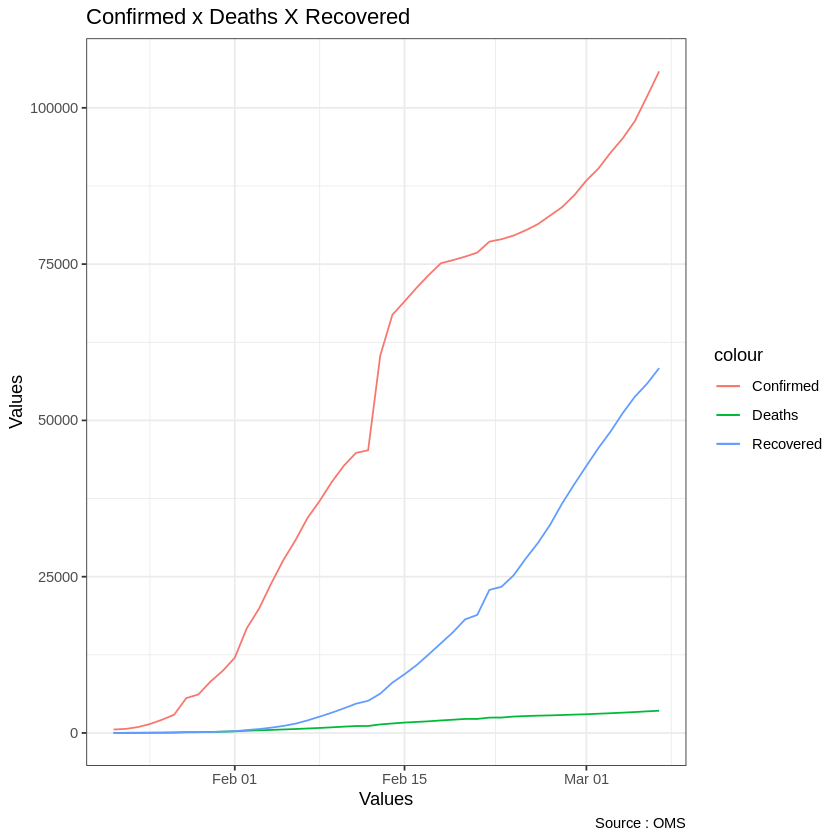

In [35]:
## EvoluÃ§Ã£o do Covid_19 dia a dia
ggplot(day_by_day,aes(x = Date)) +
  geom_line(aes(y = Confirmed, color = "Confirmed"))+
  geom_line(aes(y = Deaths, color = "Deaths"))+
  geom_line(aes(y = Recovered, color = "Recovered"))+
  theme_bw()+
  labs(title = "Confirmed x Deaths X Recovered", y = "Values", x = "Values", caption="Source : OMS" )

Podemos perceber um crescimento vertiginoso do grÃ¡fico apartir do mÃªs de fevereiro,  mas qual o grau de contribuiÃ§Ã£o de cada paÃ­s para isso. ðŸ˜¨

EntÃ£o vamos analisar os 20 paÃ­ses que mais contribuiram para a quantidade de casos confirmados no Ãºltimo dia

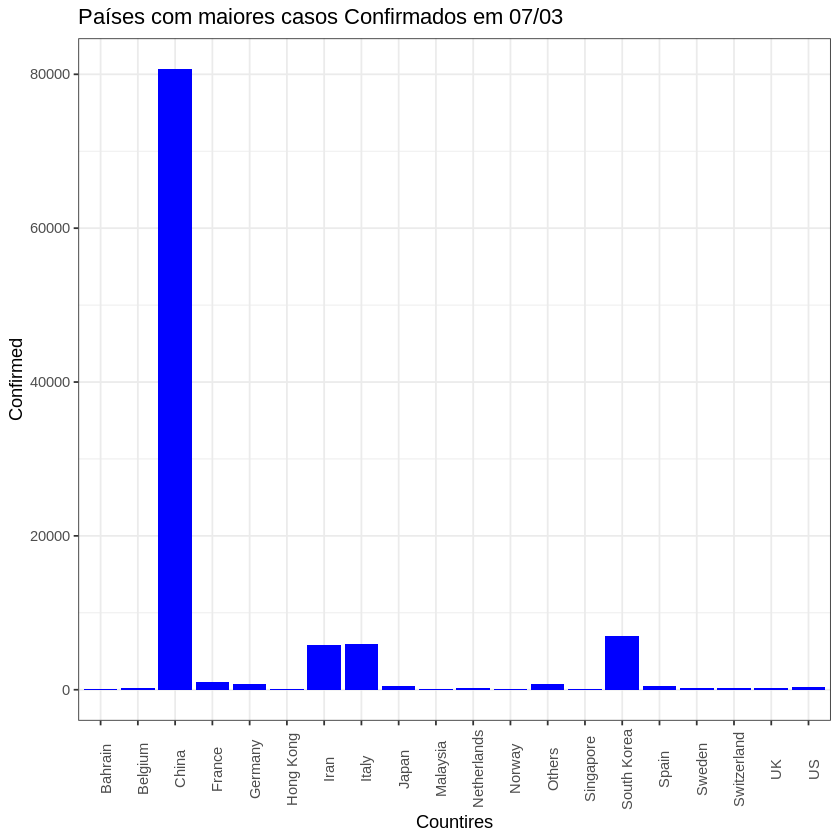

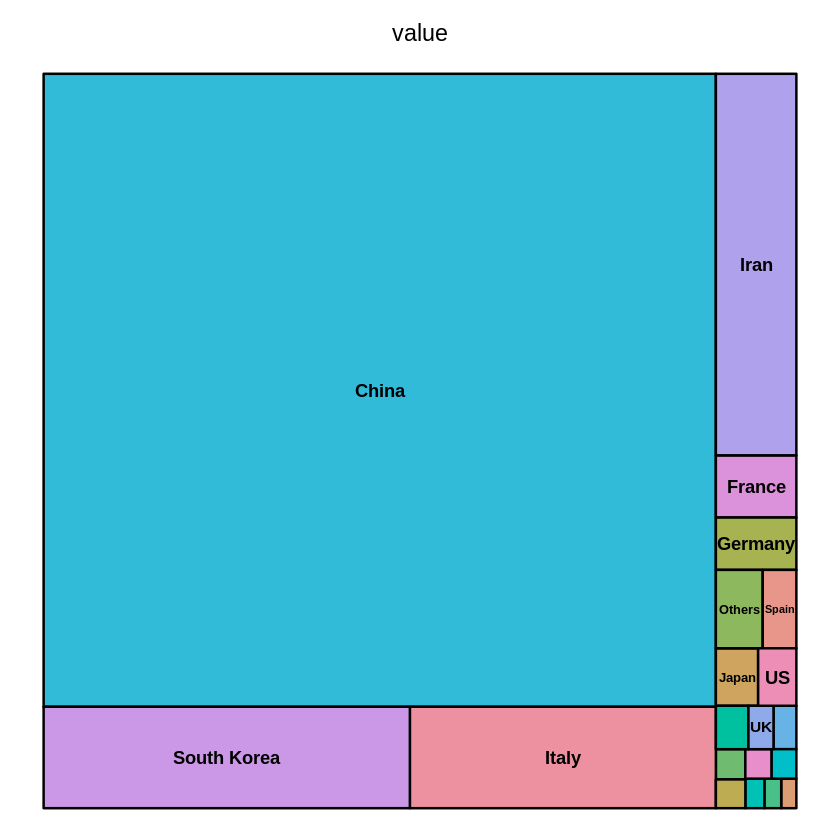

In [60]:
lt = last %>% top_n(20,Confirmed)

ggplot(lt,aes(x = Country.Region, y=Confirmed))+
  geom_col(fill = "blue")+
  theme_bw()+
  theme(axis.text.x = element_text(angle=90))+
  labs(title = "PaÃ­ses com maiores casos Confirmados em 07/03", y = "Confirmed", x = "Countires")

  group <- lt$Country.Region
value <- lt$Confirmed
data <- data.frame(group,value)

treemap(data,index="group",vSize="value",type="index")

Sem novidades atÃ© aqui a china Ã© disparada o paÃ­s com mais casos, o nÃºmero de casos Ã© tÃ£o grande que atÃ© acaba prejudicando a anÃ¡lise e nÃ£o conseguimos verificar com mais cuidado os outro Top 19, entÃ£o vamos avaliar o como estÃ¡ o comportamento quando fazemos a avaliaÃ§Ã£o sem a China.


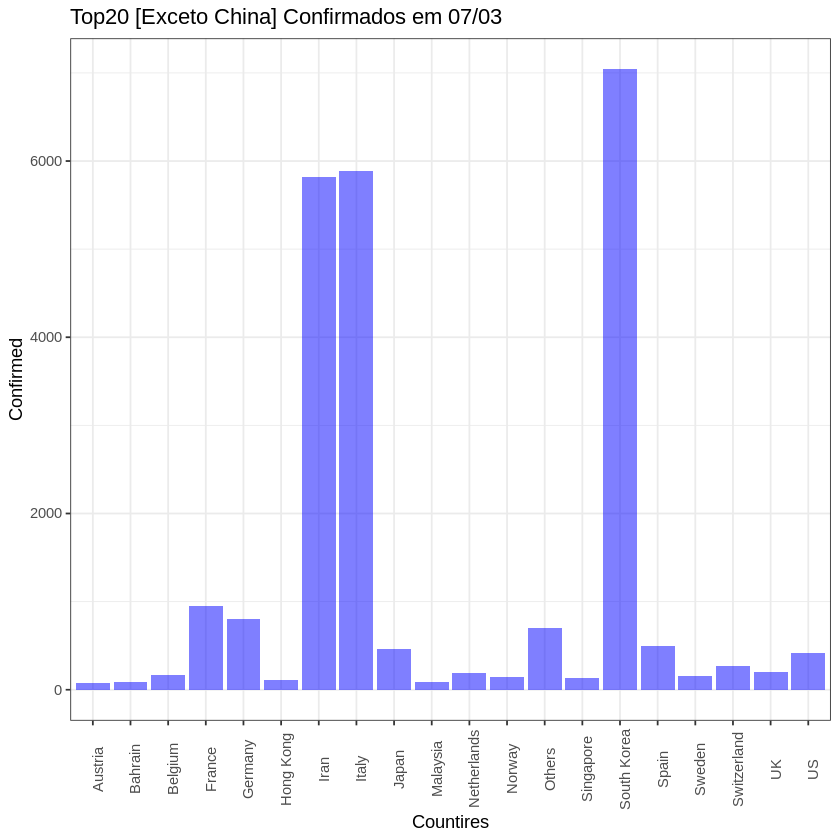

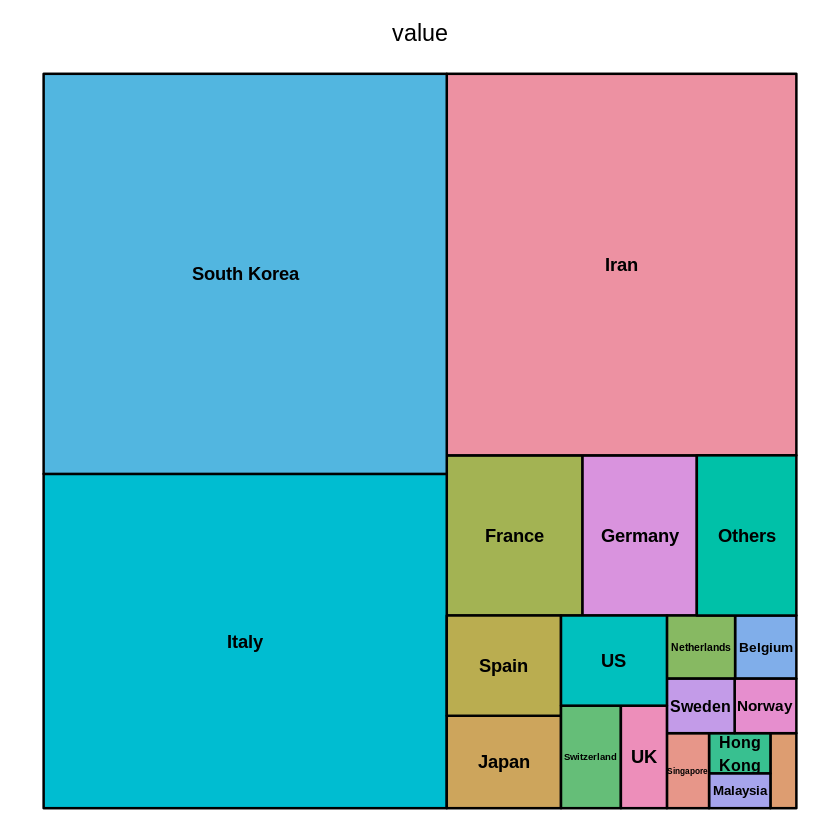

In [66]:
lt_china = last[last$Country.Region != "China",] %>% top_n(20,Confirmed)

ggplot(lt_china,aes(x = Country.Region, y=Confirmed))+
  geom_col(fill = "blue", alpha = 0.5)+
  theme_bw()+
  theme(axis.text.x = element_text(angle=90))+
  labs(title = "Top20 [Exceto China] Confirmados em 07/03", y = "Confirmed", x = "Countires")

#Treemap
lt_without_China = lt %>% filter(Country.Region != "China")
group <- lt_without_China$Country.Region
value <- lt_without_China$Confirmed
data <- data.frame(group,value)
treemap(data,index="group",vSize="value",type="index")

Agora que ja conseguimos perceber como estÃ¡ o status de casos confirmados vamos expandir um pouco a anÃ¡lise, mas para isso precisaremos manipular o nosso dataset, agrupando colunas em linhas para facilitar a visualizaÃ§Ã£o para isso utilziaremos os pacotes tidyr e dplyr

O que iremos fazer Ã© agrupar as colunas confirmed, deaths, recovered para uma Ãºnica coluna chamada status, isso nos trarÃ¡ a possibilidade de agrupar os valores como fatores nos mesmos grÃ¡ficos facilitando a visualizaÃ§Ã£o

vamos fazer 3 novos data_frames :
1. c19_gather, que trarÃ¡ os dados dia por dia
2. lt_gather , que trarÃ¡ os dados do ultimo dia disponÃ­vel no dataset (top 20)
3. lt_gather , que trarÃ¡ os dados do ultimo dia disponÃ­vel porÃ©m sem a China (top 19)



In [46]:
c19_gather = gather(last,key="status",value="number",Confirmed,Deaths,Recovered)
lt_gather = gather(lt,key="status",value="number",Confirmed,Deaths,Recovered)
lt_china_gather = gather(lt_china,key="status",value="number",Confirmed,Deaths,Recovered)

head(c19_gather)

head(lt_gather)


head(lt_china_gather)

Date     Country.Region status    number
1 20-03-07 Afghanistan    Confirmed  1    
2 20-03-07 Algeria        Confirmed 17    
3 20-03-07 Andorra        Confirmed  1    
4 20-03-07 Argentina      Confirmed  8    
5 20-03-07 Armenia        Confirmed  1    
6 20-03-07 Australia      Confirmed 63

Date     Country.Region status    number
1 20-03-07 Bahrain        Confirmed    85 
2 20-03-07 Belgium        Confirmed   169 
3 20-03-07 China          Confirmed 80652 
4 20-03-07 France         Confirmed   949 
5 20-03-07 Germany        Confirmed   799 
6 20-03-07 Hong Kong      Confirmed   108

Date     Country.Region status    number
1 20-03-07 Austria        Confirmed  79   
2 20-03-07 Bahrain        Confirmed  85   
3 20-03-07 Belgium        Confirmed 169   
4 20-03-07 France         Confirmed 949   
5 20-03-07 Germany        Confirmed 799   
6 20-03-07 Hong Kong      Confirmed 108

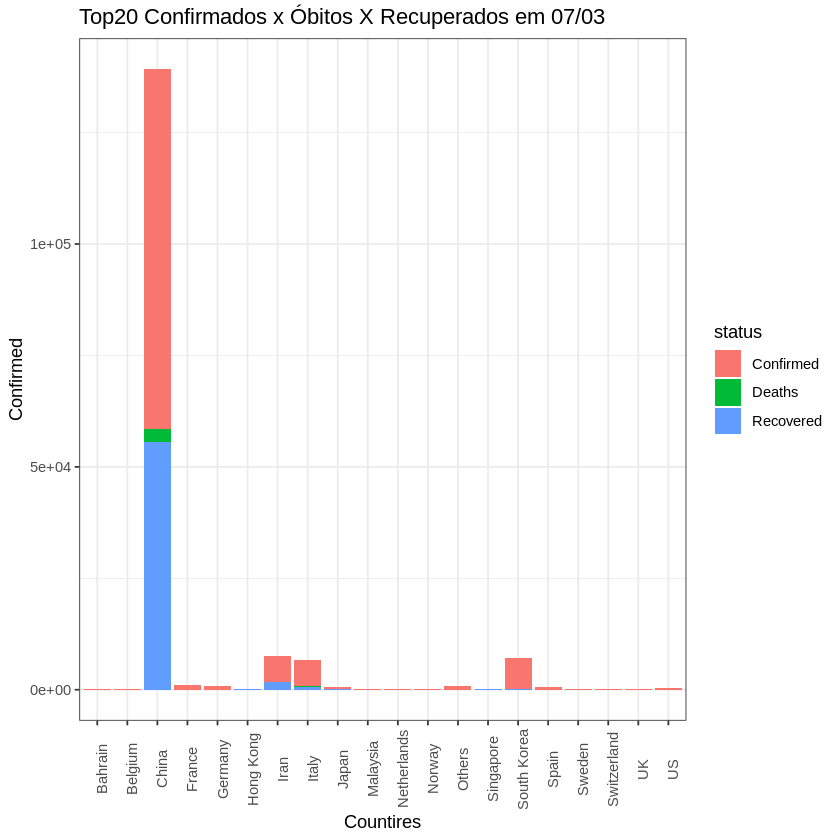

In [51]:
ggplot(lt_gather,aes(x=Country.Region, y=number, fill = status ))+
  geom_col()+
  theme_bw()+
  theme(axis.text.x = element_text(angle=90))+
  labs(title = "Top20 Confirmados x Ã“bitos X Recuperados em 07/03", y = "Confirmed", x = "Countires")

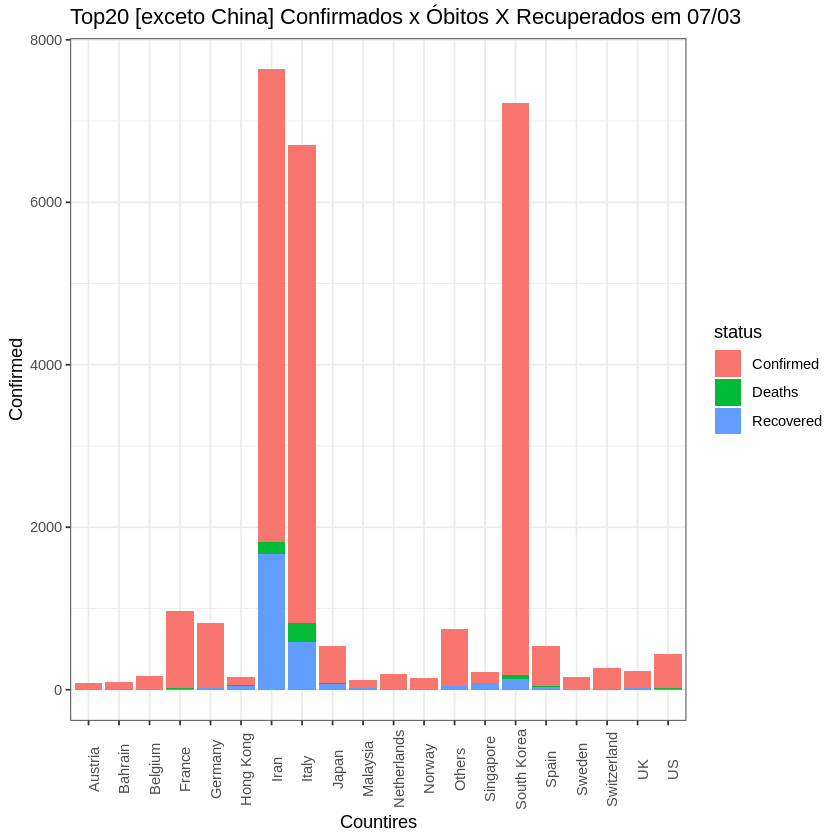

In [54]:
ggplot(lt_china_gather,aes(x=Country.Region, y=number, fill = status ))+
  geom_col()+
  theme_bw()+
  theme(axis.text.x = element_text(angle=90))+
  labs(title = "Top20 [exceto China] Confirmados x Ã“bitos X Recuperados em 07/03", y = "Confirmed", x = "Countires")

Avaliando os dois grÃ¡ficos acima podemos perceber que apesar da contaminaÃ§Ã£o ser muito fÃ¡cil e rÃ¡pida o nÃºmero de casos de Ã³bito Ã© baixo com relaÃ§Ã£o aos infectados, ainda pode-se notar que nÃ£o hÃ¡ relaÃ§Ã£o proporcial entre o nÃºmero de infectados e o de Ã³bitos (vamos continuar explorando mais abaixo).

Como podemos ver a taxa de mortalidade da ItÃ¡lia Ã© maior do que a taxa de mortalidade do iran, veremos em mais detalhes nas prÃ³ximas etapas. Isso se dÃ¡ devido o fato de a ItÃ¡lia possuir uma quantidade de idosos em circulaÃ§Ã£o muito maior do que no Iran por exemplo. A itÃ¡lia Ã© destino frequente de aposentados para passar as fÃ©rias. AlÃ©m disso mais de 15% da populaÃ§Ã£o europeia tem mais de 50 anos.
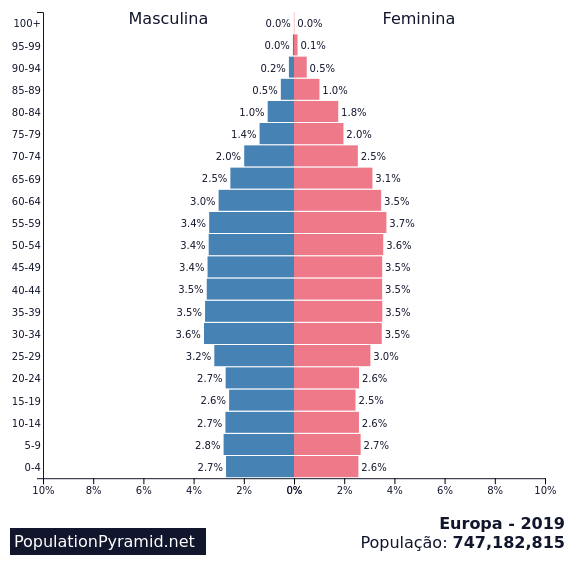

*nÃ£o encontrei um dataset com a idade dos infectados entÃ£o, nÃ£o serÃ¡ possÃ­vel comprovar nesse estudo essa relaÃ§Ã£o (Ã³bitos, x idade dos infectados), entretanto ela ja foi comprovada em outros estudos vide a matÃ©ria abaixo.

https://www.bbc.com/portuguese/brasil-51539986

Em prÃ³ximos estudos futuros irei realizar uma avaliaÃ§Ã£o mais profunda sobre a relaÃ§Ã£o dos infectados com a faixa etÃ¡ria e os demais episÃ³dios de epidemia como (H1N1, Ebola etc).


Agora vamos aprofundar a anÃ¡lise na taxa de mortalidade do vÃ­rus ou seja , a quantidade de Ã³bitos por casos confirmados.

Nessa avaliaÃ§Ã£o podemos verificar que a taxa de mortalidade gira entre 2,5 e 3,0 %. Podemos verificar alguns paÃ­ses como o PaquistÃ£o e San Marino que possuem nÃºmero de casos extremamente baixo.

Gostaria de destacar ItÃ¡lia e USA, sÃ£o paÃ­ses com a taxa de mortalidade extremamente alta prÃ³xima de 4,0%.

A demora na adoÃ§Ã£o de medidas mais drÃ¡sticas de controle epidomolÃ³gico, higiene e controle influencia de maneira negativa auxiliando o rÃ¡pido avanÃ§o dos casos.

Podemos ver o exemplo positivo da Coreia do Sul que apesar do paÃ­s ser um dos mais infectados a taxa de mortaldiade do vÃ­rus nÃ£o chega a 1%. Isso se dÃ¡ devido a medidas de seguranÃ§a, higiene e controle epidemolÃ³gico adotados pelo paÃ­s que estÃ£o sendo muito bem sucedidos no controle do vÃ­rus.

Date     Country.Region Confirmed Deaths Recovered Mortality 
1  20-03-07 Australia         63        2      21      3.1746032
2  20-03-07 China          80652     3070   55478      3.8064772
3  20-03-07 France           949       11      12      1.1591149
4  20-03-07 Hong Kong        108        2      51      1.8518519
5  20-03-07 Iran            5823      145    1669      2.4901254
6  20-03-07 Iraq              54        4       0      7.4074074
7  20-03-07 Italy           5883      233     589      3.9605643
8  20-03-07 Japan            461        6      76      1.3015184
9  20-03-07 Netherlands      188        1       0      0.5319149
10 20-03-07 Others           696        6      40      0.8620690
11 20-03-07 Philippines        6        1       1     16.6666667
12 20-03-07 San Marino        23        1       0      4.3478261
13 20-03-07 South Korea     7041       44     135      0.6249112
14 20-03-07 Spain            500       10      30      2.0000000
15 20-03-07 Switzerland      268        1       3      0.3731343
16 20-03-07 Taiwan            45        1      12      2.2222222
17 20-03-07 Thailand          50        1      31      2.0000000
18 20-03-07 UK               206        2      18      0.9708738
19 20-03-07 US               417       17       8      4.0767386

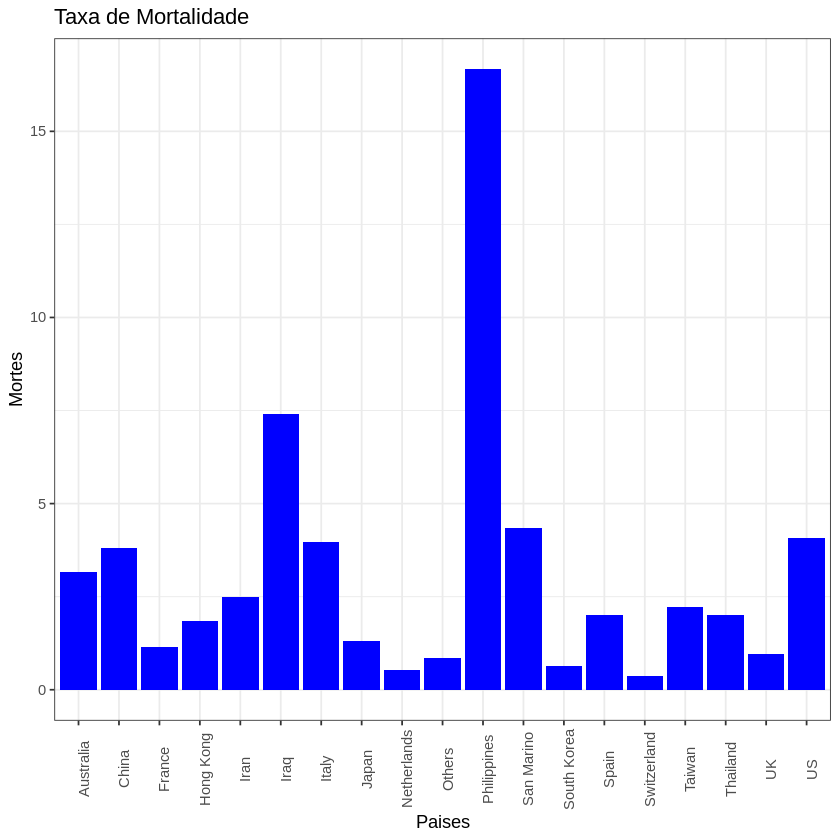

In [71]:
lt_deaths = last[last$Deaths>=1,]

lt_deaths = lt_deaths %>% mutate(Mortality = (Deaths/Confirmed)*100)

lt_deaths

ggplot(lt_deaths, aes(x = Country.Region, y = Mortality))+
  geom_col(fill = "blue")+
  theme_bw()+
  theme(axis.text.x = element_text(angle=90))+
  labs(title = "Taxa de Mortalidade", y = "Mortes", x = "Paises")

Agora avaliando os nÃºmeros absolutos de Ã³bitos do Corona VÃ­rus, com e sem a China


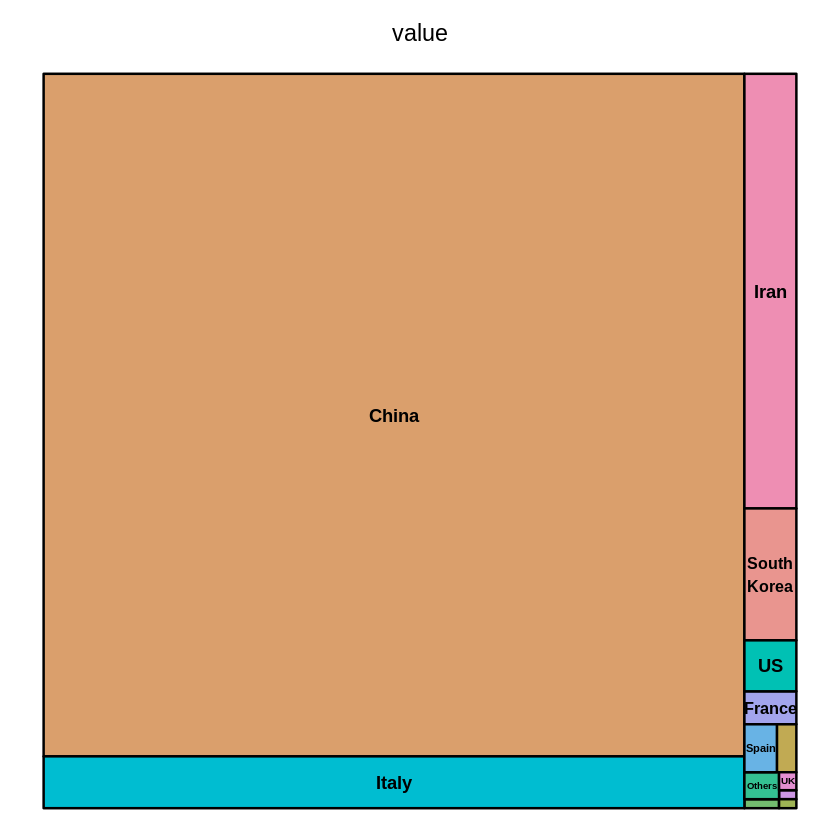

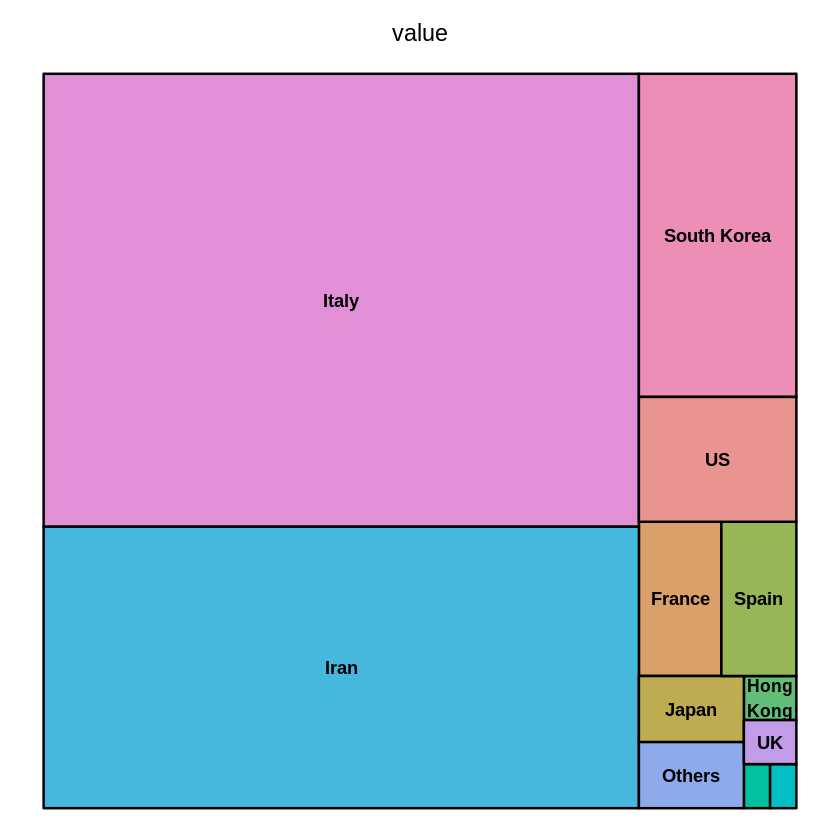

In [70]:
group <- lt$Country.Region
value <- lt$Deaths
data <- data.frame(group,value)
treemap(data,index="group",vSize="value",type="index")

##Deaths Without China
lt_without_China = lt %>% filter(Country.Region != "China")
group <- lt_without_China$Country.Region
value <- lt_without_China$Deaths
data <- data.frame(group,value)
treemap(data,index="group",vSize="value",type="index")

**Vamos avaliar a evoluÃ§Ã£o dos casos do Covid_19 ao longo do tempo**



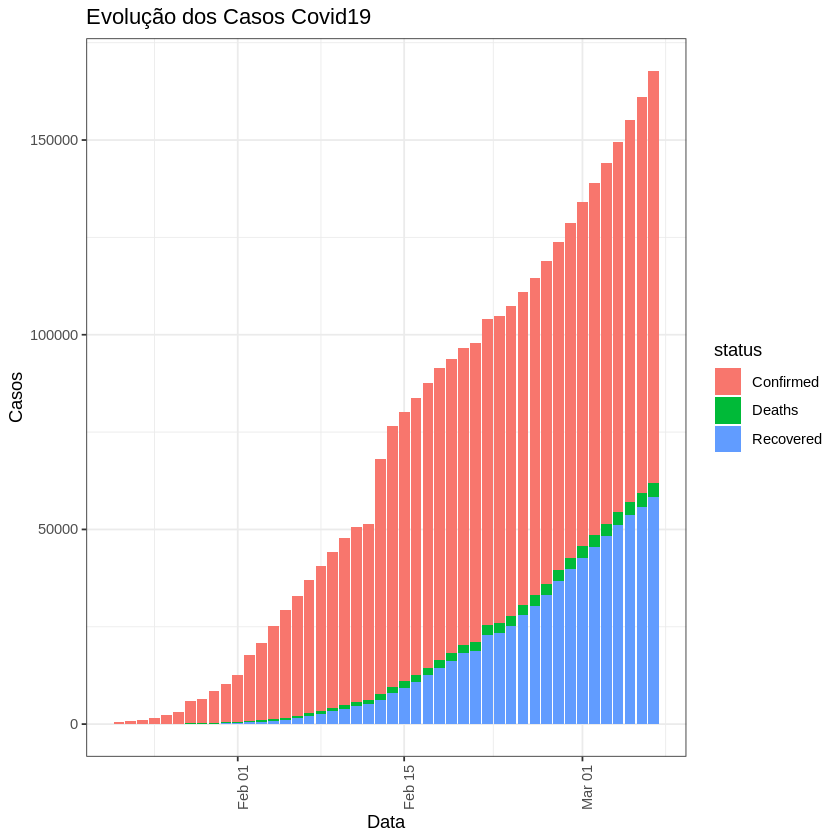

In [74]:
data = c19 %>% gather(key ="status",value="value",Confirmed,Deaths,Recovered)
data = data %>% filter(value >0)

ggplot(data, aes(x = Date , y = value, fill= status))+
  geom_col()+
  theme_bw()+
  theme(axis.text.x = element_text(angle=90))+
  labs(title = "EvoluÃ§Ã£o dos Casos Covid19", y = "Casos", x = "Data")

In [0]:
ggplot(data, aes(x = Date , y = value, fill= Country.Region))+
  geom_col()+
  theme_bw()+
  theme(axis.text.x = element_text(angle=90))+
  labs(title = "Taxa de Mortalidade", y = "Mortes", x = "Paises")

  #Como ficou dificil de ver, vou postar a imagem do R.studio aqui em baixo.

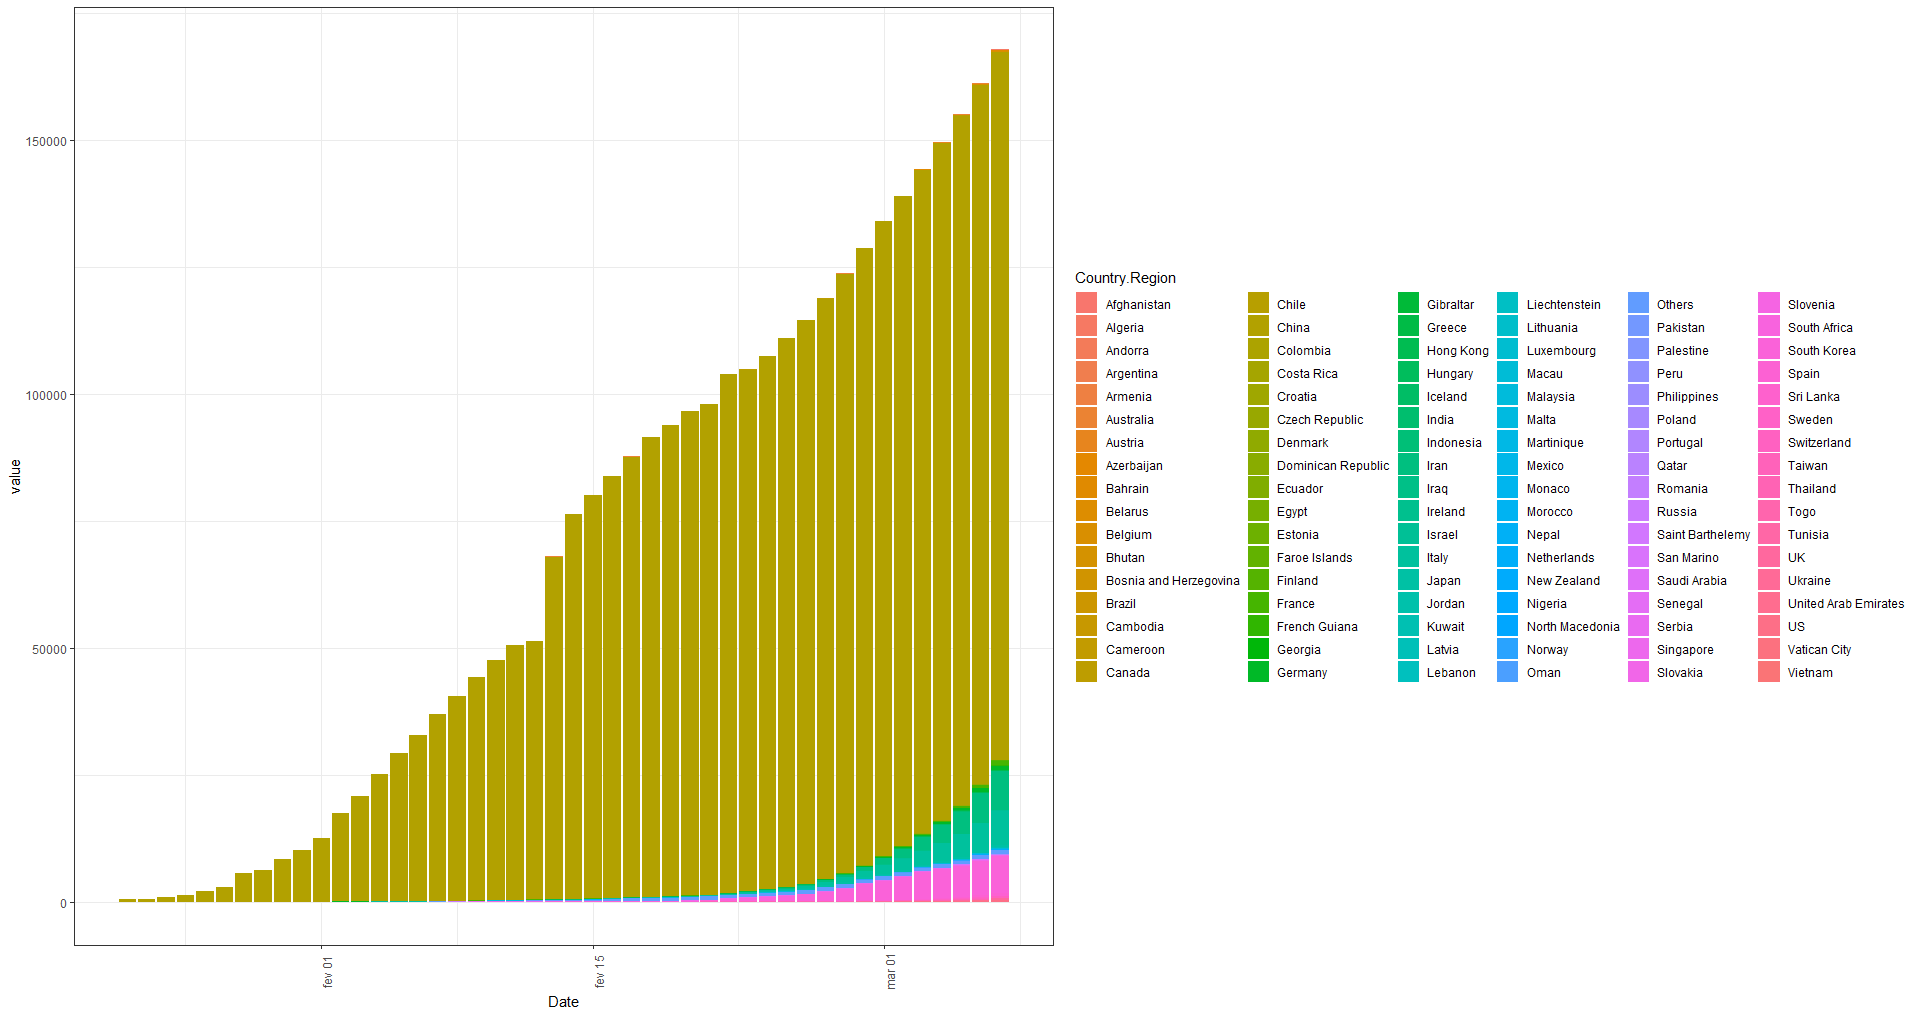

**Avaliando os dados da China individualmente**

Olhando os Dados abaixo somente da evoluÃ§Ã£o dentro do paÃ­s Oriental, podemos perceber que o nÃºmero de casos confirmdos estÃ¡ subindo em uma proporÃ§Ã£o menor do que a de casos recuperados, enquanto o nÃºmero de mortes permanece "controlado".

Ã‰ exatamente o ContrÃ¡rio do que estÃ¡ acontecendo neste momento no resto do Mundo , com uma curva de aceleraÃ§Ã£o completamente diferente.

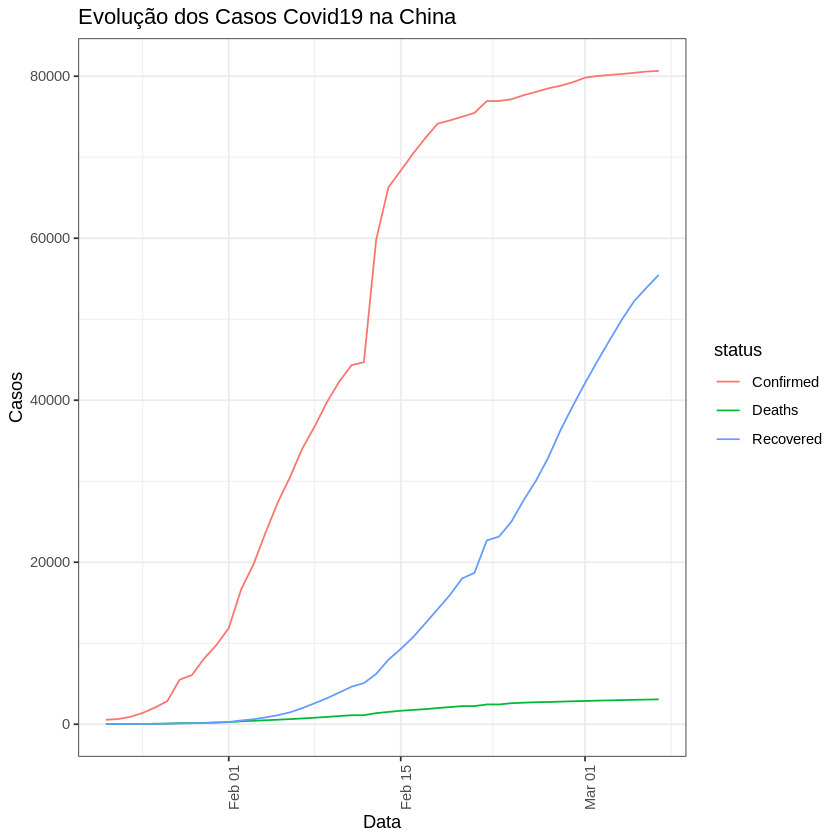

In [131]:
data_without_china = data[data$Country.Region =="China",]
ggplot(data_without_china, aes(x = Date , y = value, color= status))+
  geom_line()+
  theme_bw()+
  theme(axis.text.x = element_text(angle=90))+
  labs(title = "EvoluÃ§Ã£o dos Casos Covid19 na China", y = "Casos", x = "Data")


**Agora vamos fazer as anÃ¡lises desconsiderando a China**

> Indented block



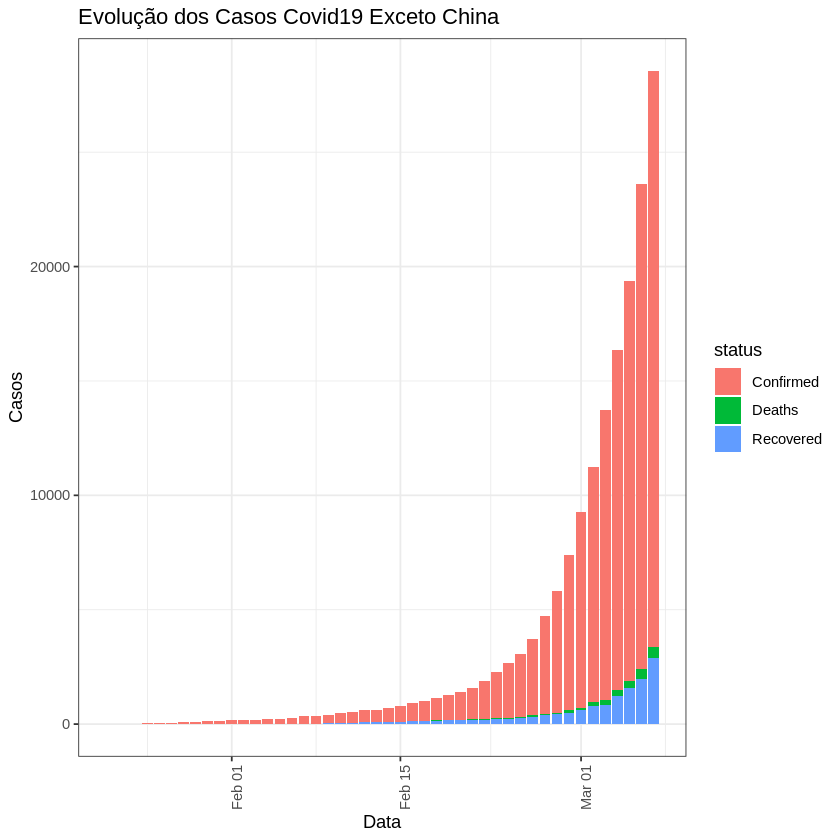

In [132]:
data_without_china = data[data$Country.Region !="China",]
ggplot(data_without_china, aes(x = Date , y = value, fill= status))+
  geom_col()+
  theme_bw()+
  theme(axis.text.x = element_text(angle=90))+
  labs(title = "EvoluÃ§Ã£o dos Casos Covid19 Exceto China", y = "Casos", x = "Data")

In [0]:
data_without_china = data[data$Country.Region !="China",]
ggplot(data_without_china, aes(x = Date , y = value, fill= Country.Region))+
  geom_col()+
  theme_bw()+
  theme(axis.text.x = element_text(angle=90))+
  labs(title = "EvoluÃ§Ã£o dos Casos Covid19 Exceto China", y = "Casos", x = "Data")

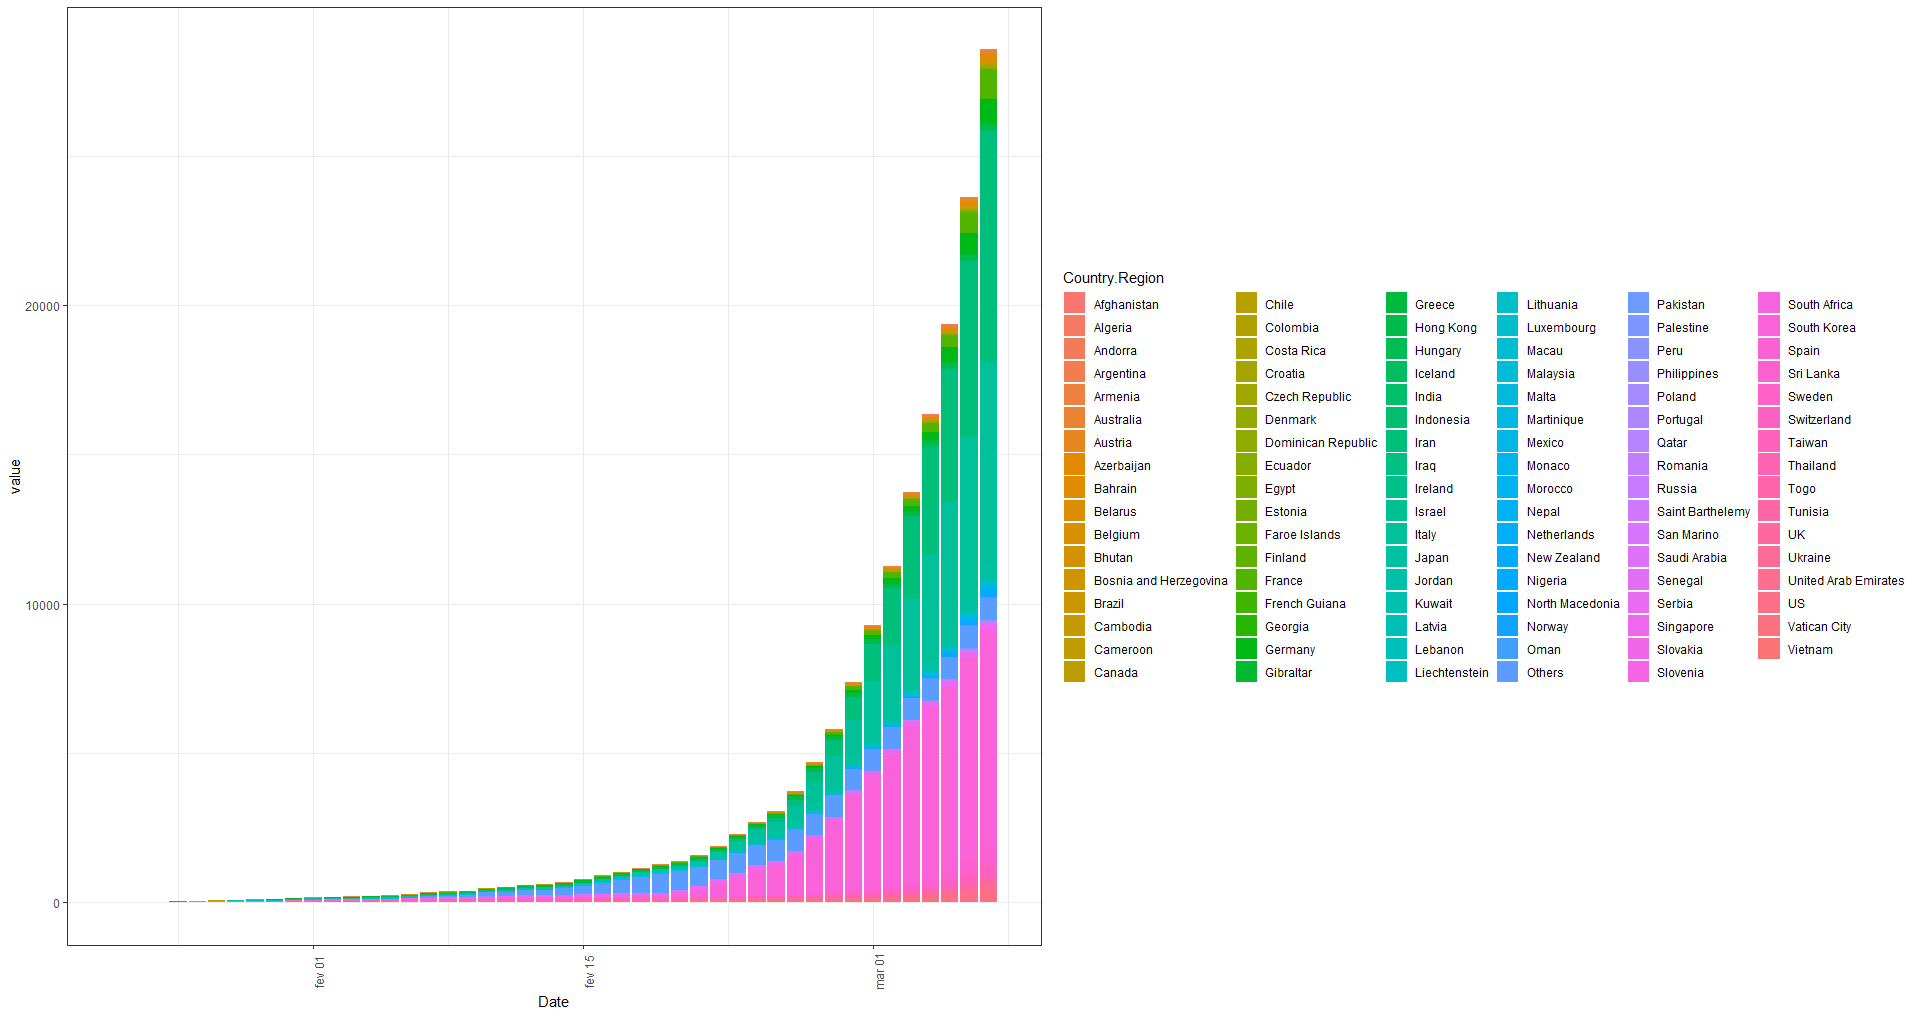

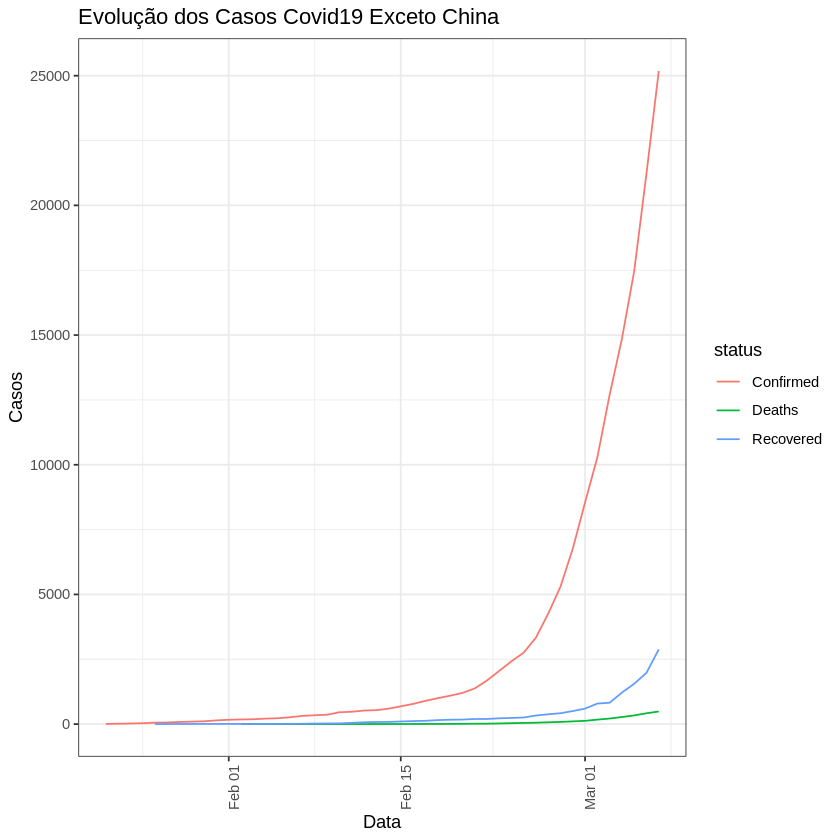

In [134]:
data_without_china = data[data$Country.Region !="China",]
data_without_china2 = data_without_china %>% group_by(Date, status) %>% summarise(Total = sum(value))

ggplot(data_without_china2, aes(x = Date , y = Total, color= status))+
  geom_line()+
  theme_bw()+
  theme(axis.text.x = element_text(angle=90))+
  labs(title = "EvoluÃ§Ã£o dos Casos Covid19 Exceto China", y = "Casos", x = "Data")

**Resto do Mundo**

Ao avaliar o CenÃ¡rio da China isoladamente percebemos que existe uma tendÃªncia de estabalizaÃ§Ã£o dos casos, o contrÃ¡rio do que percebemos ao avaliar os dados do resto mundo, principalmente em paÃ­ses Ocidentais do HemisfÃ©rio Norte,se comprovando atravÃ©s do aumento vertiginoso dos casos nos EUA, ItÃ¡lia e Espanha.


**Agora vamos avaliar como o vÃ­rus ja se espalhou pelo mundo.**

Para isso vamos voltar ao dataset original , e aproveitar os dados de latitude e longitude , criando um novo dataframe

In [0]:
map_df = smmy
str(map_df)

map_df$Country.Region = as.character(map_df$Country.Region)
map_df$Province.State = NULL
map_df[map_df$Country.Region == "Mainland China",1] = "China"

map = map_data("world")

map_df = map_df %>% filter(Confirmed >0)

In [0]:
ggplot() +
  geom_polygon(data = map, aes(x=long, y = lat, group = group), fill="grey", alpha=0.3)+
  geom_point(data=map_df, aes(x=Long, y=Lat, size=Confirmed), color = "blue", alpha= 0.5)+
  theme_classic()+
  labs(title = "Casos confirmados Global", y = "Casos", x = "Data")

Como a visualizaÃ§Ã£o do Notebook nÃ£o estÃ¡ ajudando muito, vou colar aqui a imagem resultado do R.Studio. Nesse chart podemos ver os casos confirmados espalhados pelo globo.

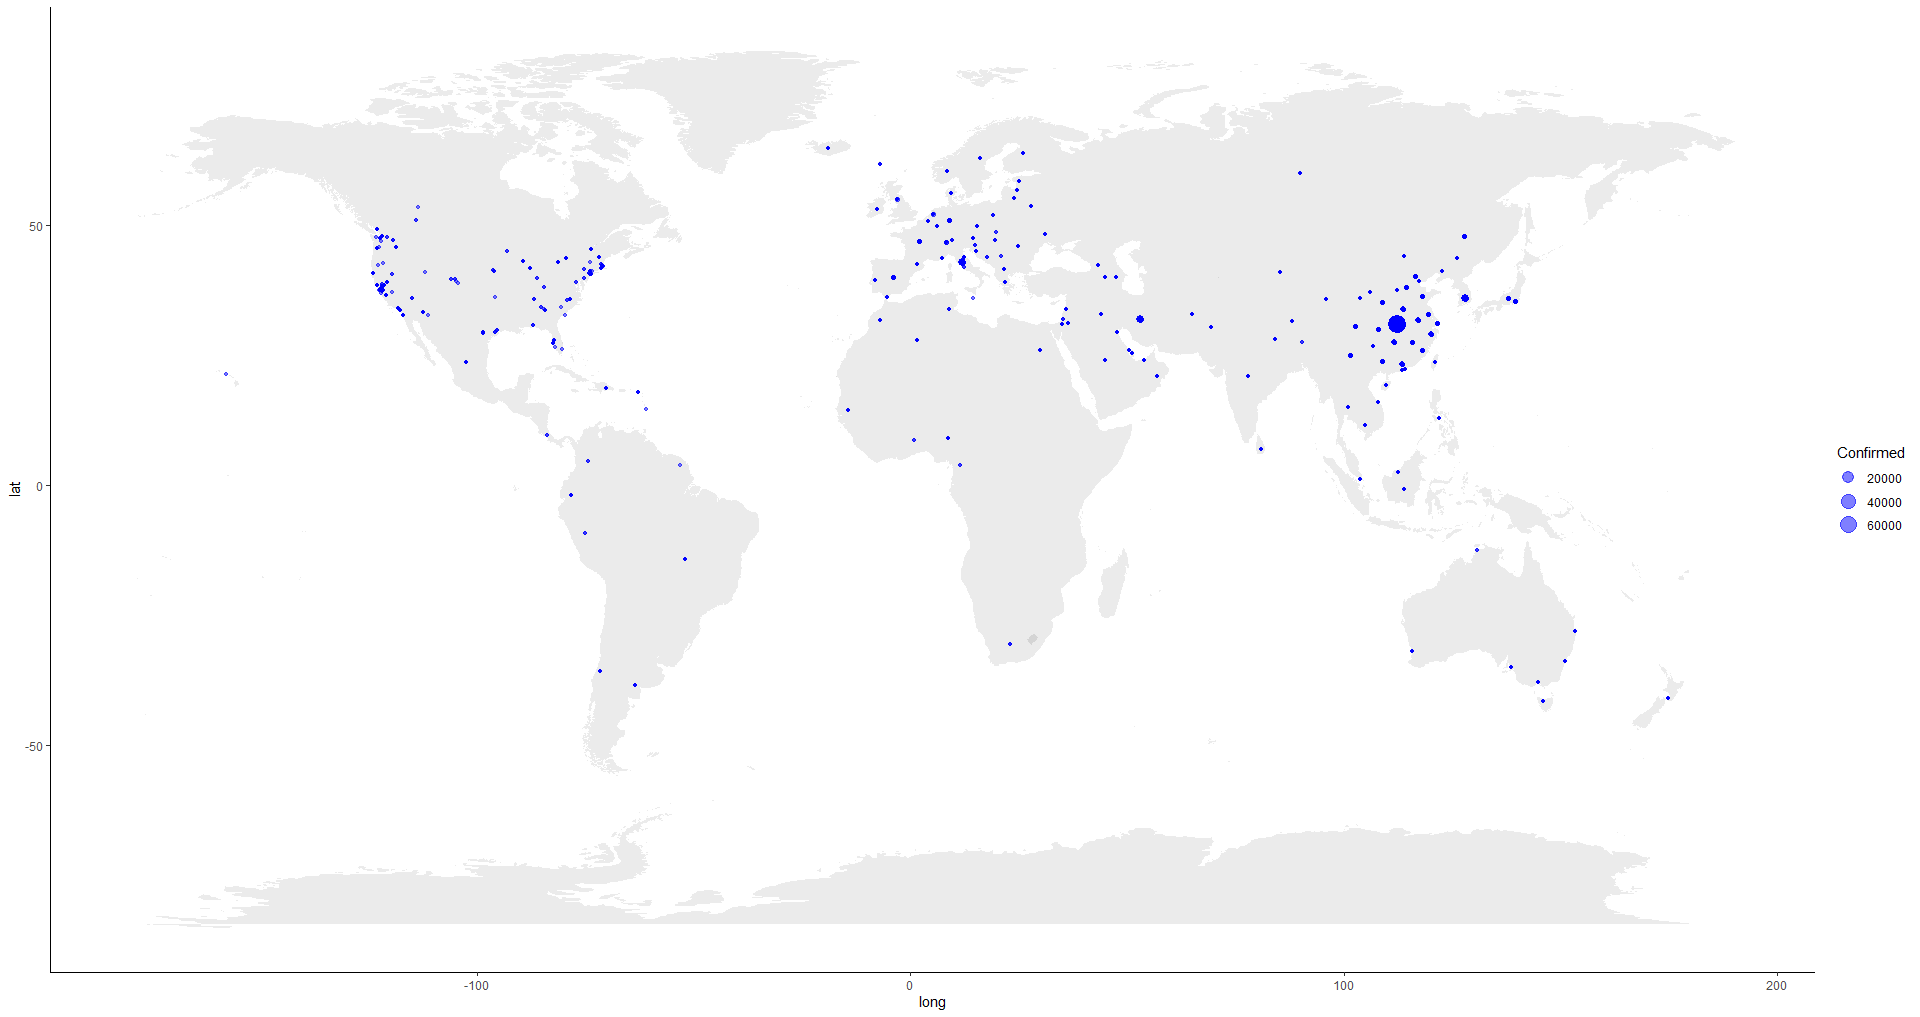

In [0]:
map_df_Deaths = map_df %>% filter( Deaths > 0)

ggplot() +
  geom_polygon(data = map, aes(x=long, y = lat, group = group), fill="grey", alpha=0.3)+
  geom_point(data=map_df_Deaths, aes(x=Long, y=Lat, size=Deaths), color = "red", alpha= 0.5)+
  theme_classic()+
  labs(title = "Casos de Ã“bito Global", y = "Casos", x = "Data")

Agora vamos visualizar os casos de Ã³bitos

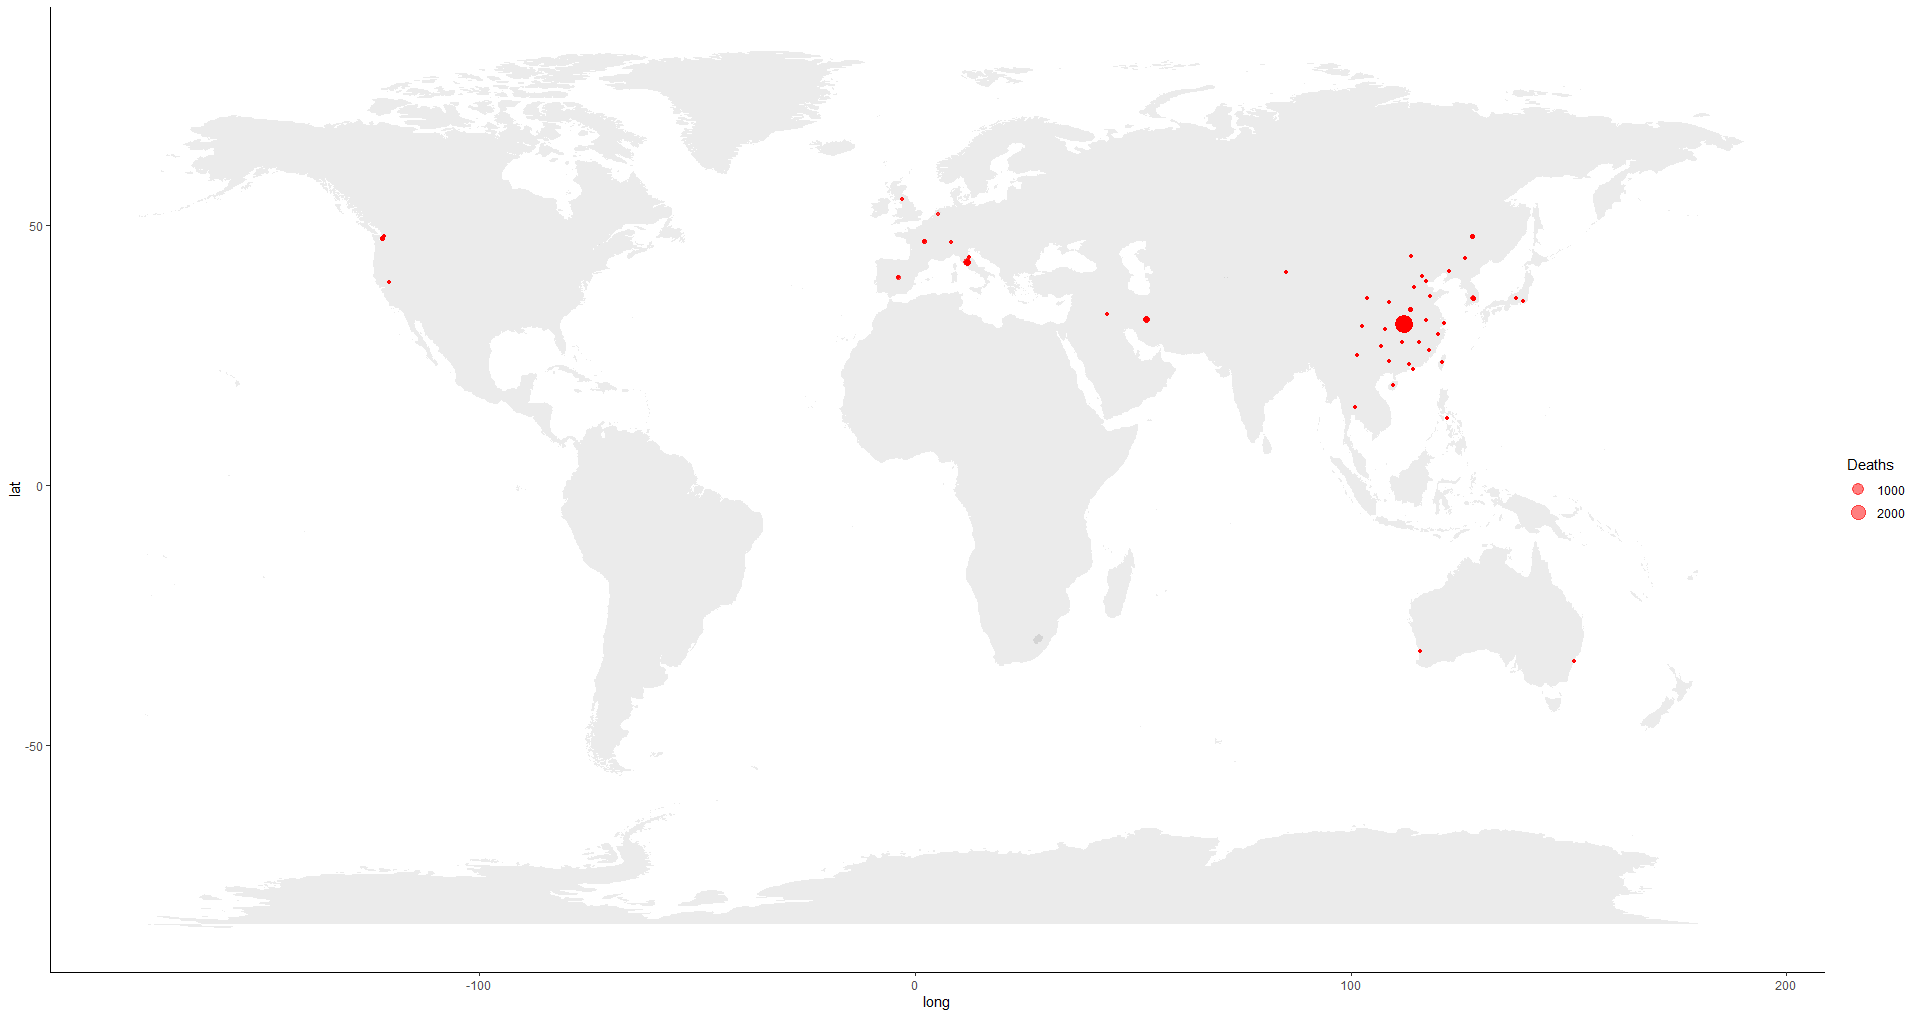

In [0]:
ggplot() +
  geom_polygon(data = map, aes(x=long, y = lat, group = group), fill="grey", alpha=0.3)+
  geom_point(data=map_df, aes(x=Long, y=Lat, size=Confirmed), color = "blue", alpha= 0.5)+
  geom_point(data=map_df_Deaths, aes(x=Long, y=Lat, size=Deaths), color = "red", alpha= 0.5)+
  theme_classic()

Avaliando os grÃ¡ficos sobrepostos podemos ver com clareza os que o vÃ­rus ja se espalhou por todo globo, porÃ©m ao avaliar a quantidade de mortes(em vermelho), tambÃ©m fica mais uma vez comprovada a baixa letalidade do vÃ­rus.


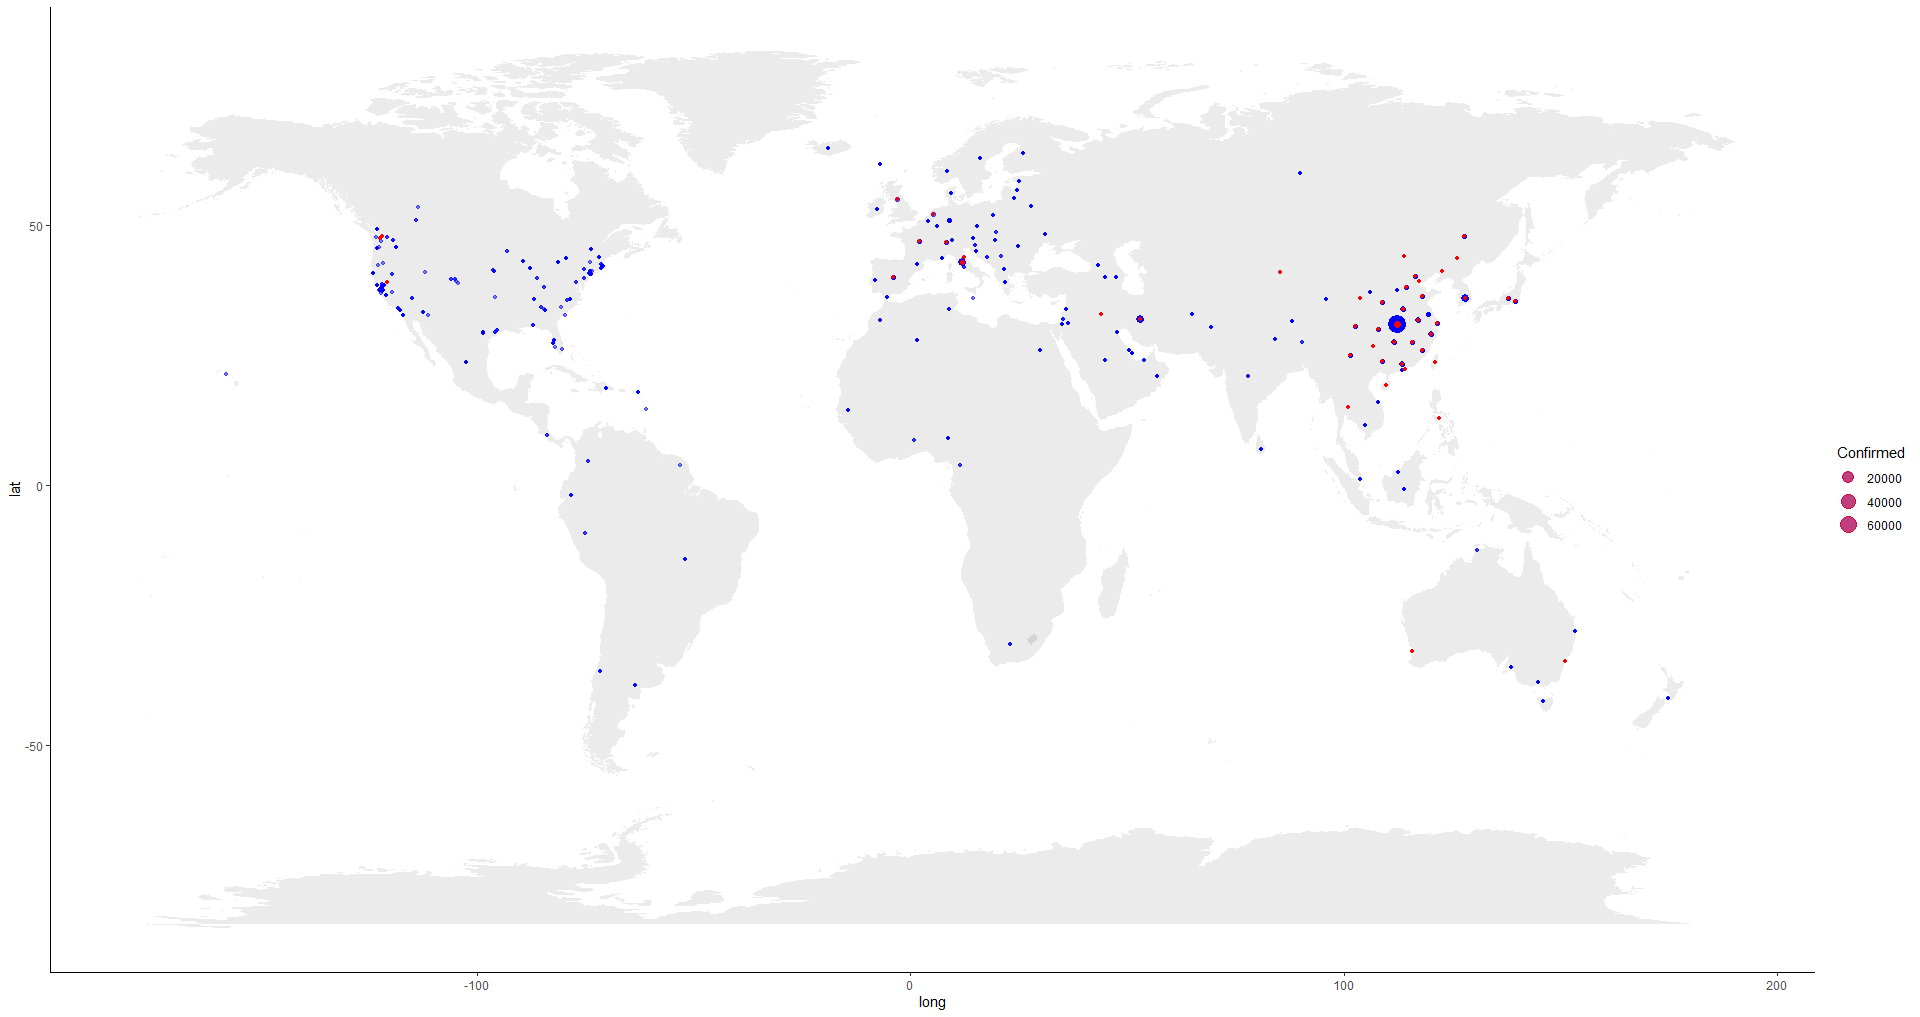

Ja sabemos como o vÃ­rus se aspalhou pelo mundo inteiro , entÃ£o agora vamos verificar a quantidade de novos casos pelo mundo, para isso precisamos fazer uma adaptaÃ§Ã£o do nosso dataset, para verificarmos quantos novos casos surgiram a cada dia e em cada paÃ­s.

Agora montamos um novo dataframe com uma coluna adiconal que mostra a quantidade de novos casos naquele dia , e nÃ£o mais somente o nÃºmero acumulado de casos, como estava o nosso dataframe anterior.


In [122]:
test = data %>% arrange(Country.Region)
test = test[test$status == "Confirmed",]

diff= c()

for(i in 1:length(test$value)){
  if(i==1){
    d = 1
    diff = c(diff,d)
  }else if(test$Country.Region[i] == test$Country.Region[i-1]){
    d = test$value[i] - test$value[i-1]
    if(d<0){
      diff = c(diff,test$value[i])
    }else{
      diff = c(diff,d)
    }
  }else{
    d = test$value[i]
    diff = c(diff,d)
  }
}
new_cases = data.frame(test$Date,test$Country.Region,test$status,test$value,diff)
new_cases_wChina = new_cases %>% filter(new_cases$test.Country.Region != "China")

new_cases


test.Date test.Country.Region test.status test.value diff
1    20-02-24  Afghanistan         Confirmed    1         1   
2    20-02-25  Afghanistan         Confirmed    1         0   
3    20-02-26  Afghanistan         Confirmed    1         0   
4    20-02-27  Afghanistan         Confirmed    1         0   
5    20-02-28  Afghanistan         Confirmed    1         0   
6    20-02-29  Afghanistan         Confirmed    1         0   
7    20-03-01  Afghanistan         Confirmed    1         0   
8    20-03-02  Afghanistan         Confirmed    1         0   
9    20-03-03  Afghanistan         Confirmed    1         0   
10   20-03-04  Afghanistan         Confirmed    1         0   
11   20-03-05  Afghanistan         Confirmed    1         0   
12   20-03-06  Afghanistan         Confirmed    1         0   
13   20-03-07  Afghanistan         Confirmed    1         0   
14   20-02-25  Algeria             Confirmed    1         1   
15   20-02-26  Algeria             Confirmed    1         0   
16   20-02-27  Algeria             Confirmed    1         0   
17   20-02-28  Algeria             Confirmed    1         0   
18   20-02-29  Algeria             Confirmed    1         0   
19   20-03-01  Algeria             Confirmed    1         0   
20   20-03-02  Algeria             Confirmed    3         2   
21   20-03-03  Algeria             Confirmed    5         2   
22   20-03-04  Algeria             Confirmed   12         7   
23   20-03-05  Algeria             Confirmed   12         0   
24   20-03-06  Algeria             Confirmed   17         5   
25   20-03-07  Algeria             Confirmed   17         0   
26   20-03-02  Andorra             Confirmed    1         1   
27   20-03-03  Andorra             Confirmed    1         0   
28   20-03-04  Andorra             Confirmed    1         0   
29   20-03-05  Andorra             Confirmed    1         0   
30   20-03-06  Andorra             Confirmed    1         0   
â‹®    â‹®         â‹®                   â‹®           â‹®          â‹®   
1713 20-02-15  Vietnam             Confirmed   16          0  
1714 20-02-16  Vietnam             Confirmed   16          0  
1715 20-02-17  Vietnam             Confirmed   16          0  
1716 20-02-18  Vietnam             Confirmed   16          0  
1717 20-02-19  Vietnam             Confirmed   16          0  
1718 20-02-02  Vietnam             Confirmed    6          6  
1719 20-02-20  Vietnam             Confirmed   16         10  
1720 20-02-21  Vietnam             Confirmed   16          0  
1721 20-02-22  Vietnam             Confirmed   16          0  
1722 20-02-23  Vietnam             Confirmed   16          0  
1723 20-02-24  Vietnam             Confirmed   16          0  
1724 20-02-25  Vietnam             Confirmed   16          0  
1725 20-02-26  Vietnam             Confirmed   16          0  
1726 20-02-27  Vietnam             Confirmed   16          0  
1727 20-02-28  Vietnam             Confirmed   16          0  
1728 20-02-29  Vietnam             Confirmed   16          0  
1729 20-02-03  Vietnam             Confirmed    8          8  
1730 20-02-04  Vietnam             Confirmed    8          0  
1731 20-02-05  Vietnam             Confirmed    8          0  
1732 20-02-06  Vietnam             Confirmed   10          2  
1733 20-02-07  Vietnam             Confirmed   10          0  
1734 20-02-08  Vietnam             Confirmed   13          3  
1735 20-02-09  Vietnam             Confirmed   13          0  
1736 20-03-01  Vietnam             Confirmed   16          3  
1737 20-03-02  Vietnam             Confirmed   16          0  
1738 20-03-03  Vietnam             Confirmed   16          0  
1739 20-03-04  Vietnam             Confirmed   16          0  
1740 20-03-05  Vietnam             Confirmed   16          0  
1741 20-03-06  Vietnam             Confirmed   16          0  
1742 20-03-07  Vietnam             Confirmed   18          2

In [0]:
ggplot(new_cases_wChina, aes(x = test.Date, y = diff, fill = test.Country.Region))+
  geom_col()+
  theme_bw()+
  theme(axis.text.x = element_text(angle=90))

Quantidade de novos casos , exceto a china Dia por Dia

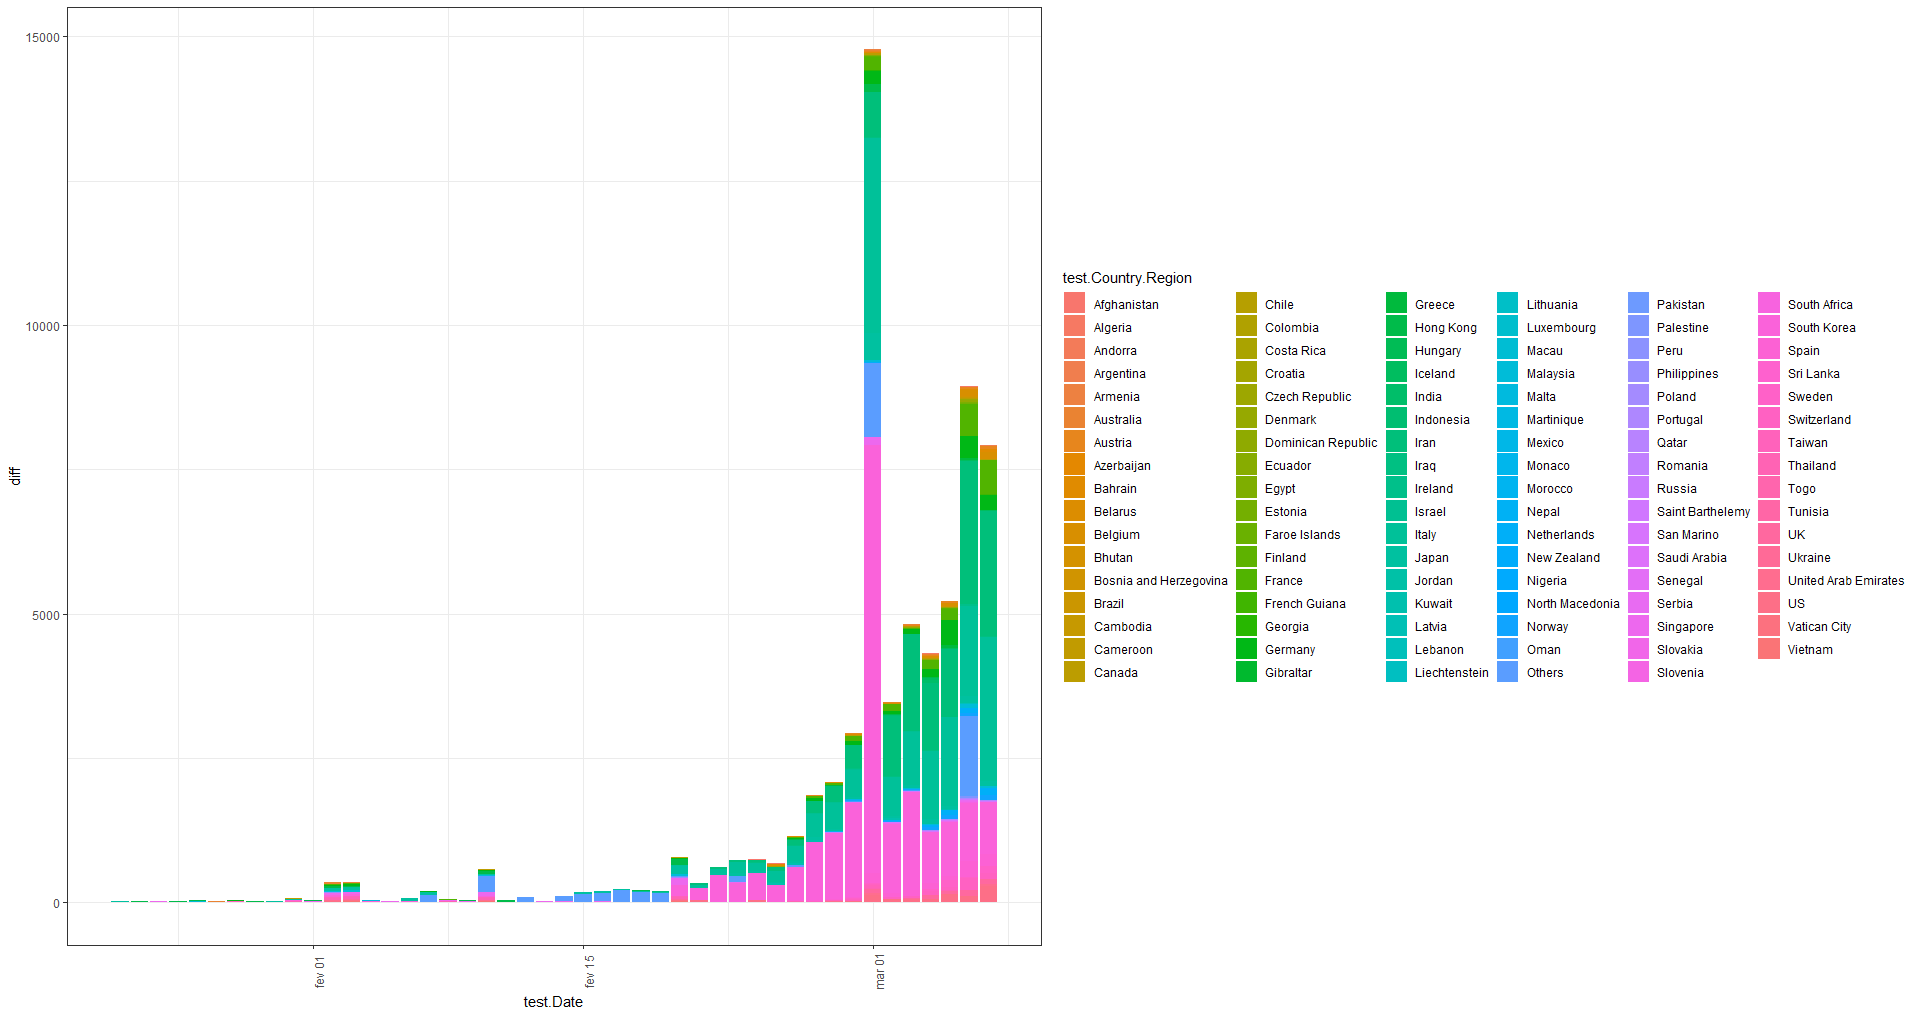

In [0]:
temp = new_cases %>% group_by(test.Country.Region) %>% summarise(Confirmed = max(test.value))

top20 = temp %>% top_n(20,Confirmed)
top20_wChina = temp %>% filter(test.Country.Region != "China") %>% top_n(20,Confirmed) 

top20_new = new_cases %>% filter(test.Country.Region %in% top20$test.Country.Region)

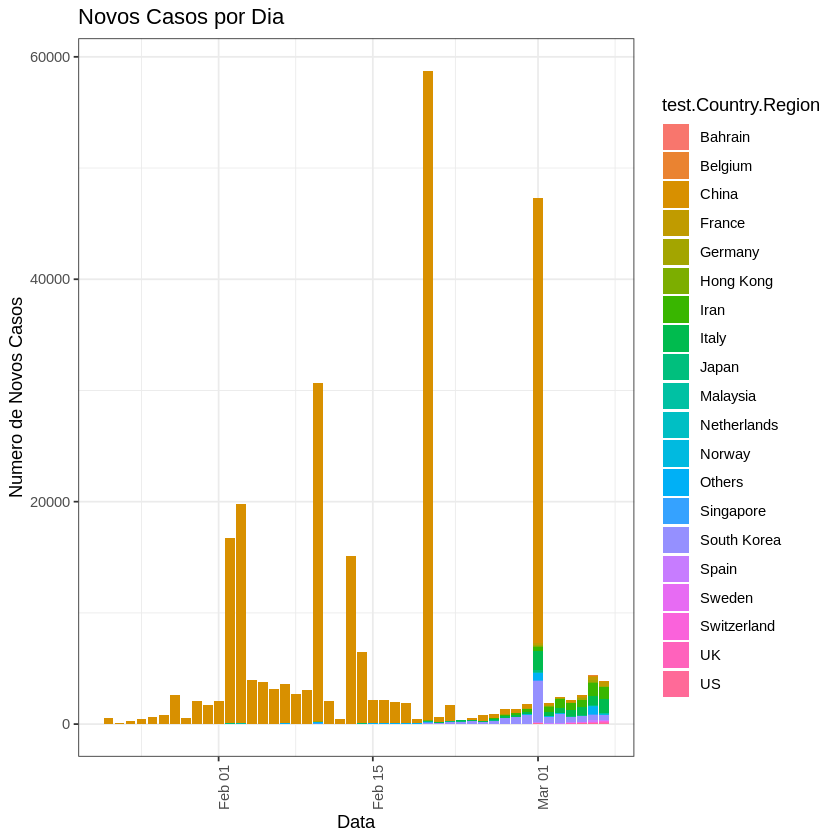

In [136]:
ggplot(top20_new, aes(x = test.Date, y = diff, fill = test.Country.Region))+
  geom_col()+
  theme_bw()+
  theme(axis.text.x = element_text(angle=90))+
  labs(title = "Novos Casos por Dia", y = "Numero de Novos Casos", x = "Data")

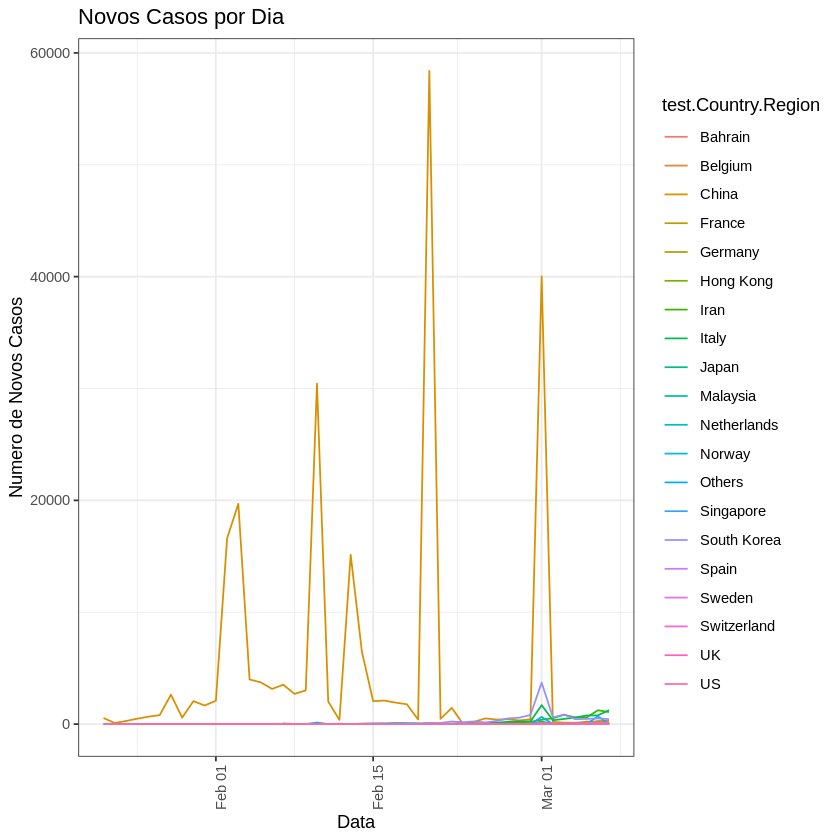

In [137]:
ggplot(top20_new, aes(x = test.Date, y = diff, color = test.Country.Region))+
  geom_line()+
  theme_bw()+
  theme(axis.text.x = element_text(angle=90))+
  labs(title = "Novos Casos por Dia", y = "Numero de Novos Casos", x = "Data")

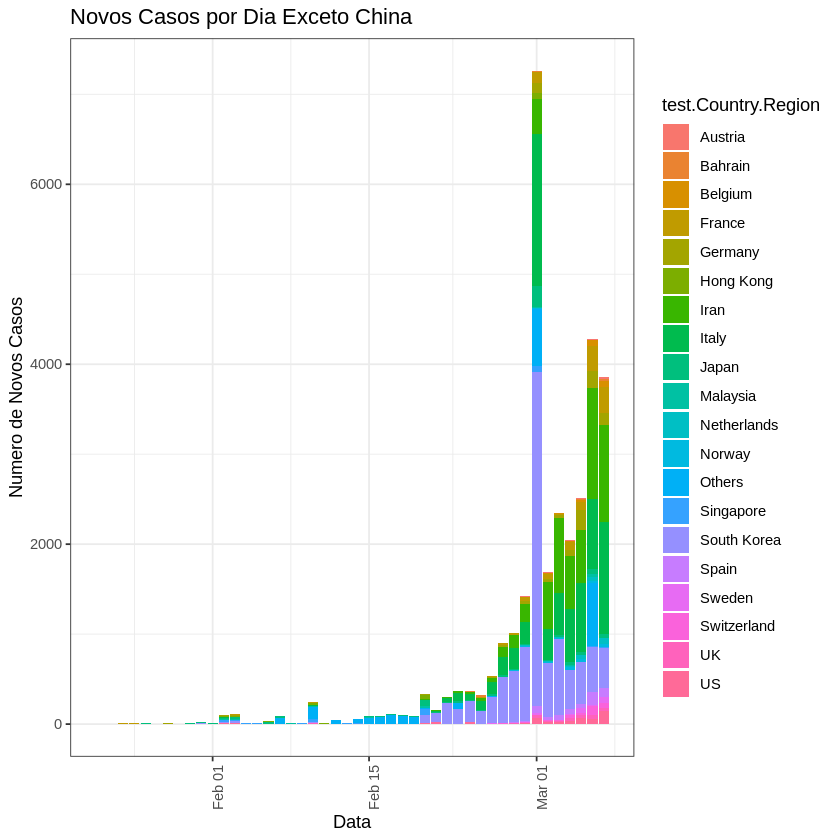

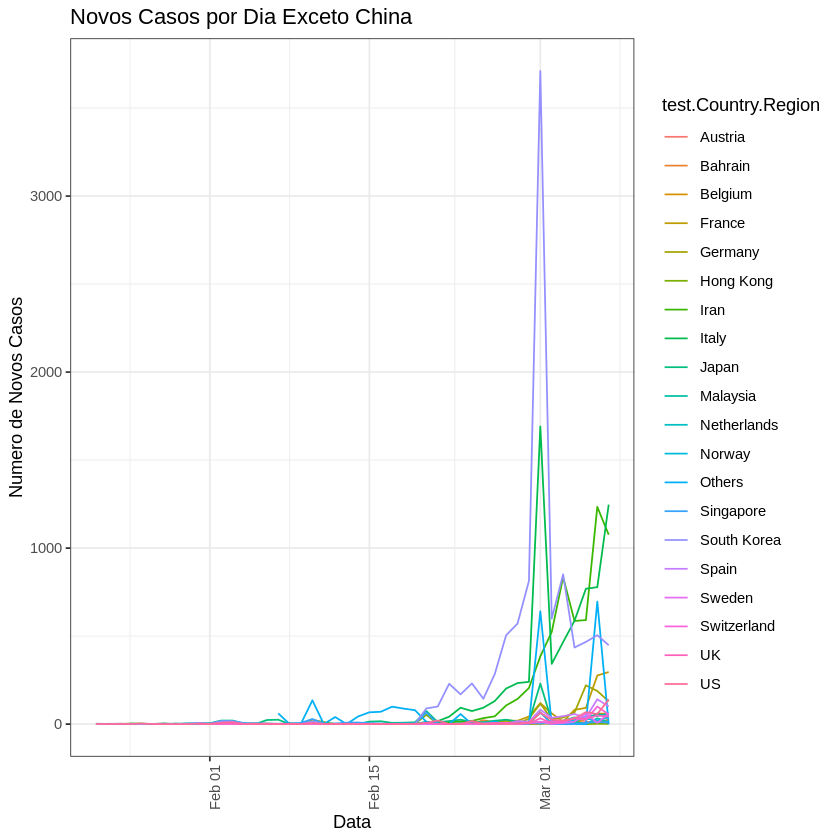

In [140]:
top20_new_wChina = new_cases %>% filter(test.Country.Region %in% top20_wChina$test.Country.Region)

ggplot(top20_new_wChina, aes(x = test.Date, y = diff, fill = test.Country.Region))+
  geom_col()+
  theme_bw()+
  theme(axis.text.x = element_text(angle=90))+
  labs(title = "Novos Casos por Dia Exceto China", y = "Numero de Novos Casos", x = "Data")

  ggplot(top20_new_wChina, aes(x = test.Date, y = diff, color = test.Country.Region))+
  geom_line()+
  theme_bw()+
  theme(axis.text.x = element_text(angle=90))+
  labs(title = "Novos Casos por Dia Exceto China", y = "Numero de Novos Casos", x = "Data")